<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 6: *Regression***

###**Tenggat Waktu: 12 April 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab6_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 12 April 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.


In [169]:
# Isi dengan data diri Anda
NAMA = "Scudetto Ciano Syam"
KELAS = "C"
NPM = "2206083294"
USERNAME_KAGGLE = "Scudetto"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ['Tutorial lab kasdad', 'chat gpt', 'referensi lainnya dicantumkan langsung pada kode']

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Scudetto Ciano Syam dari kelas C dengan NPM 2206083294, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Scudetto Ciano Syam)


### Linear Regression

Linear regression adalah metode statistik yang digunakan untuk menemukan hubungan linear antara variabel independen (**X**) dan variabel dependen (**Y**). Tujuan dari linear regression adalah mencari parameter yang menghasilkan garis atau hyperplane terbaik yang meminimalkan selisih antara nilai prediksi dan nilai aktual.


**Persamaan Linear Regression**

Linear regression dapat direpresentasikan dengan persamaan berikut:

$\
y = w_{0} + w_{1}x
$

Dimana:
- $\ w_{0} $ adalah intersep (nilai \( y \) ketika $\ x = 0 $)
- $\ w_{1} $ adalah koefisien regresi (kemiringan garis regresi)
- $\ x $ adalah variabel independen
- $\ y $ adalah variabel dependen

Jika terdapat lebih dari satu variabel independen, persamaannya diperluas menjadi:

$\
y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
$

Ini disebut **multiple linear regression**, di mana terdapat banyak fitur (**X**) yang memengaruhi nilai keluaran (**Y**).

**Cara Menentukan Koefisien ($\ w $ )**

Koefisien dalam linear regression dihitung dengan meminimalkan **fungsi loss**, yaitu perbedaan antara nilai aktual dan prediksi. J(w) di bawah ini adalah contoh fungsi loss linear regression.

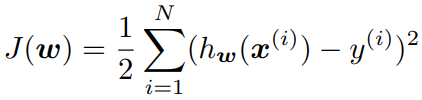

Salah satu metode optimasi yang umum digunakan adalah **gradient descent**, yang bekerja dengan memperbarui nilai \( w \) berdasarkan turunan dari fungsi loss.

**Aplikasi Linear Regression**

Linear regression sering digunakan dalam berbagai bidang seperti:
- Prediksi harga (misalnya harga rumah berdasarkan luas tanah, lokasi, dan fasilitas)
- Analisis tren (misalnya pertumbuhan pendapatan berdasarkan tahun)
- Model ekonomi dan keuangan

Teknik ini menjadi dasar dalam banyak model machine learning dan analisis data.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

Kita akan membuat dataset dengan 1 variabel independen (X) dan 1 target (y) yang mengikuti persamaan:

$y=3+2X$

Dalam hal ini:

$w_0 = 3$ adalah intersep

$w_1 = 2$ adalah koefisien regresi.

Mari kita buat dataset dengan sedikit noise untuk merepresentasikan data nyata, lalu melatih model linear regression.

In [3]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

# Membuat data buatan dengan noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X_train = X.reshape(-1, 1) # Mengubah bentuk array agar sesuai dengan format Scikit-learn
y_train = np.array([5, 7, 10, 11, 13, 15, 17, 20, 21, 23])  # Mengikuti y = 3 + 2X dengan sedikit noise

print('X: ', X_train)
print('y: ', y_train)

X:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y:  [ 5  7 10 11 13 15 17 20 21 23]


In [4]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [5]:
# Menampilkan koefisien dan intersep dari model
print("Koefisien persamaan linear: ", linear.coef_)  # Harus mendekati 2
print("Intersep persamaan linear: ", linear.intercept_)  # Harus mendekati 3

Koefisien persamaan linear:  [2.]
Intersep persamaan linear:  3.200000000000001


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

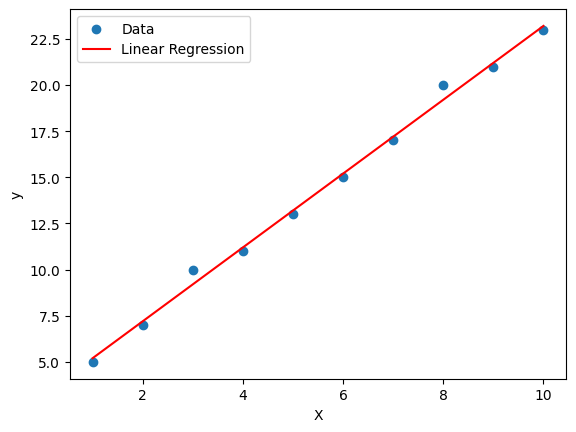

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Coba memprediksi data baru.

In [7]:
# Prediksi dengan Data Baru
X_test = np.array([[2], [5], [8]])
y_test = np.array([7, 13, 19])  # Nilai sebenarnya sesuai dengan y = 3 + 2X

y_predict = linear.predict(X_test)
print("Hasil prediksi:", y_predict)

Hasil prediksi: [ 7.2 13.2 19.2]


Evaluasi performa model

In [8]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9983333333333334


Dengan R-squared sebesar 0.9983, model memiliki akurasi yang sangat tinggi dalam memprediksi hubungan antara X dan y. Nilai R-squared yang mendekati 1 menunjukkan bahwa model dapat menjelaskan 99.83% variabilitas data, sehingga **sangat baik dalam merepresentasikan hubungan linear ini**.

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

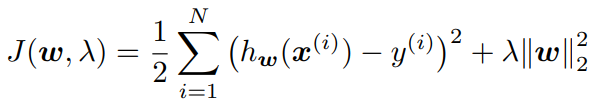

- Lasso Regression

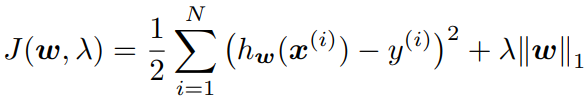

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset yang sebelumnya kita buat.

#### Ridge

In [9]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [10]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.95266272]
Intersep persamaan regresi ridge: 
 3.4603550295857985


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

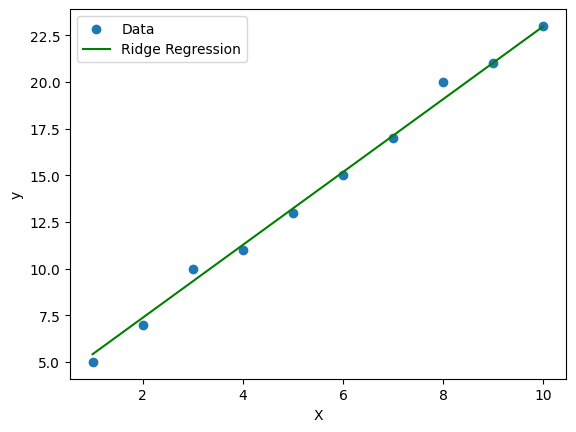

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

#### Lasso

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [12]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [13]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.75757576]
Intersep persamaan regresi lasso: 
 4.533333333333333


Berdasarkan persamaan linear pada lasso regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

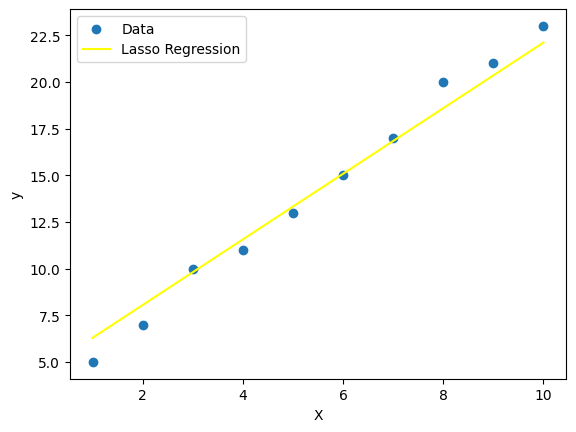

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

#### Perbandingan Linear, Ridge, Lasso Regression

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

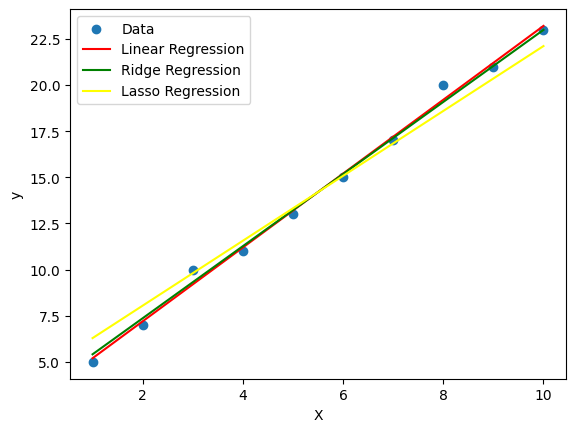

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression, Lasso Regression, dan Ridge Regression*

Dataset ini berisi sembilan pengukuran morfometrik dari 104 ekor possum gunung brushtail yang ditangkap di tujuh lokasi dari Victoria Selatan hingga Queensland tengah.

**Fitur dalam dataset:**  
1. **case**: Nomor unik yang mengidentifikasi setiap possum.  
2. **site**: Lokasi tempat possum ditangkap, dikodekan sebagai angka.  
3. **Pop**: Populasi possum berdasarkan wilayah geografisnya.  
4. **sex**: Jenis kelamin possum (m untuk jantan, f untuk betina).  
5. **age**: Usia possum dalam tahun.  
6. **hdlngth**: Panjang kepala possum dalam milimeter.  
7. **skullw**: Lebar tengkorak possum dalam milimeter.  
8. **totlngth**: Panjang total possum dari kepala hingga ujung ekor dalam milimeter.  
9. **taill**: Panjang ekor possum dalam sentimeter.  
10. **footlgth**: Panjang kaki possum dalam milimeter.  
11. **earconch**: Panjang concha telinga possum dalam milimeter.  
12. **eye**: Lebar mata possum dalam milimeter.  
13. **chest**: Lingkar dada possum dalam sentimeter.  
14. **belly**: Lingkar perut possum dalam sentimeter.  

**Target variabel:**

* **hdlngth**: Panjang kepala possum dalam milimeter.

**Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/abrambeyer/openintro-possum

In [16]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_possum = pd.read_csv('possum.csv')
df_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
# Menampilkan informasi keseluruhan terkait dataset
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi. Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang setidaknya dilakukan sebagai berikut:

* Handle missing values dan duplikat data
* Melakukan encoding pada data kategorikal
* Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
* Melakukan standarisasi pada dataset. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

#### Missing value

In [18]:
# referensi : tutorial lab 5 ksdd
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na * 100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

cek_null(df_possum)

          Total   Percent
footlgth      1  0.961538
age           2  1.923077


In [23]:
df_possum.footlgth.value_counts()

footlgth
73.2    4
65.6    3
72.8    3
62.8    2
63.1    2
       ..
72.0    1
69.0    1
64.0    1
67.9    1
62.9    1
Name: count, Length: 75, dtype: int64

In [25]:
df_possum.age.value_counts()

age
3.0    29
2.0    16
4.0    14
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: count, dtype: int64

Penanganan bisa dengan imputasi atau drop karena kecil, disini saya akan lakukan imputasi

In [24]:
# imputasi modus dan median
df_possum['age'].fillna(df_possum['age'].mode()[0], inplace=True)
df_possum['footlgth'].fillna(df_possum['footlgth'].median(), inplace=True)

cek_null(df_possum)

Tidak ditemukan missing value pada dataset


/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_12438/2064364880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_possum['age'].fillna(df_possum['age'].mode()[0], inplace=True)


#### Duplikat data

In [27]:
print("Jumlah duplikasi data: " + str(df_possum.duplicated().sum()))

# Cek duplikat dengan mengabaikan kolom 'case'
duplicates_wo_case = df_possum.drop(columns=['case']).duplicated().sum()
print(f"Jumlah duplikasi data (tanpa mempertimbangkan kolom 'case'): {duplicates_wo_case}")


Jumlah duplikasi data: 0
Jumlah duplikasi data (tanpa mempertimbangkan kolom 'case'): 0


Tidak ada duplikat data pada dataset

#### Opsional : outlier

In [31]:
# referensi : tutorial lab kasdad 5

# cek outlier dengan iqr
def check_outlier(df):
    # pilih kolom numerik aja
    df_numeric = df.select_dtypes(include=['number'])

    # Menghitung kuartil
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada tiap atribut
    outliers = (df_numeric < lower_limit) | (df_numeric > upper_limit)
    print("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = check_outlier(df_possum)

Outlier pada tiap atribut:
case        0
site        0
age         2
hdlngth     3
skullw      8
totlngth    0
taill       4
footlgth    0
earconch    0
eye         1
chest       1
belly       3
dtype: int64


Masih dibatas normal, tidak dilakukan penanganan

#### encoding categorical

In [28]:
for col in df_possum.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_possum[col].value_counts(), '\n')

No. of unique values in column Pop:
Pop
other    58
Vic      46
Name: count, dtype: int64 

No. of unique values in column sex:
sex
m    61
f    43
Name: count, dtype: int64 



In [32]:
# Label encode 'sex'
df_possum['sex'] = df_possum['sex'].map({'m': 1, 'f': 0})

# One-hot encode 'Pop' 
df_possum = pd.get_dummies(df_possum, columns=['Pop'], drop_first=True)


Saya melakukan label encode untuk sex karena variabel biner. Lalu saya melakukan one-hot untuk pop karena tidak ingin memberikan bobot/urutan (karena Vic dan other bukan ranking)

In [33]:
df_possum.head()

,case,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other
0,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,False
1,2,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,False
2,3,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,False
3,4,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,False
4,5,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,False


#### Train test split

In [35]:
from sklearn.model_selection import train_test_split

X = df_possum.drop(columns=['case', 'hdlngth'])  # case = ID, hdlngth = target
y = df_possum['hdlngth']

# Split data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Disini saya membagi jadi 80% training, 20% testing sesuai soal

#### Standarisasi

In [42]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit scaler hanya ke data training, lalu transform ke kedua set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

display(X_train_scaled.head())
display(X_test_scaled.head())

,site,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other
55,0.163068,0.853913,-0.394810,1.458659,1.461520,0.491589,0.094799,-0.313541,1.286653,0.273625,-0.350993,0.875190
22,-1.146733,-1.171080,0.160601,-0.244757,0.417118,-0.534874,1.027176,1.274772,0.321954,0.520483,0.931565,-1.142609
76,1.036268,0.853913,1.271422,-0.213212,-0.693948,-0.534874,-1.246913,-1.266529,1.093713,-0.960663,0.931565,0.875190
44,-0.710133,0.853913,-0.394810,-0.307846,-1.360587,-1.561336,0.731544,1.445822,-0.449805,0.026768,-0.350993,-1.142609
72,0.599668,0.853913,-1.505632,-1.443457,-1.138374,-0.278258,-0.587427,-0.826688,0.900773,-1.701236,-1.633550,0.875190


,site,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other
30,-1.146733,0.853913,-0.394810,-0.875651,1.305971,-0.021642,-0.064387,1.079288,-0.546275,0.026768,-0.534215,-1.142609
65,0.599668,-1.171080,-0.394810,-0.339391,-0.249521,-0.278258,-1.155950,-0.948866,0.611363,-0.220090,0.565120,0.875190
64,0.599668,-1.171080,0.716011,0.165325,0.306012,0.491589,-0.018905,-1.559756,-1.028625,1.014198,2.214123,0.875190
53,0.163068,0.853913,1.826833,1.931830,0.972651,3.057746,0.686062,-0.509026,2.347822,1.507914,1.481233,0.875190
45,-0.710133,0.853913,-0.394810,-0.781017,-0.693948,-1.048105,1.027176,0.761625,-0.642745,-1.207521,0.931565,-1.142609


Disini saya menggunakan standard scaler dan transform ke data train agar tidak terjadi data leakage

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `hdlngth` sebagai target prediksi. Tampilkan hasil prediksi pada keseluruhan data uji.

In [51]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred = linear_model.predict(X_test_scaled)

# Tampilkan hasil prediksi vs aktual
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print("Hasil Prediksi vs Aktual:")
print(results_df)


Hasil Prediksi vs Aktual:
    Actual  Predicted
0     92.8  91.819167
1     90.4  91.498006
2     93.5  94.209311
3     96.9  98.724985
4     91.4  90.890191
5     91.8  94.218661
6     90.7  92.380805
7     98.6  97.215065
8     93.3  95.138410
9     94.1  96.984645
10    94.4  94.172940
11    94.3  94.178330
12    97.7  94.104194
13    94.8  91.394984
14    86.5  86.173773
15    91.5  91.289666
16    90.6  92.917353
17    90.6  90.709973
18    95.1  93.966586
19    90.5  87.730740
20    93.3  91.487275


b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

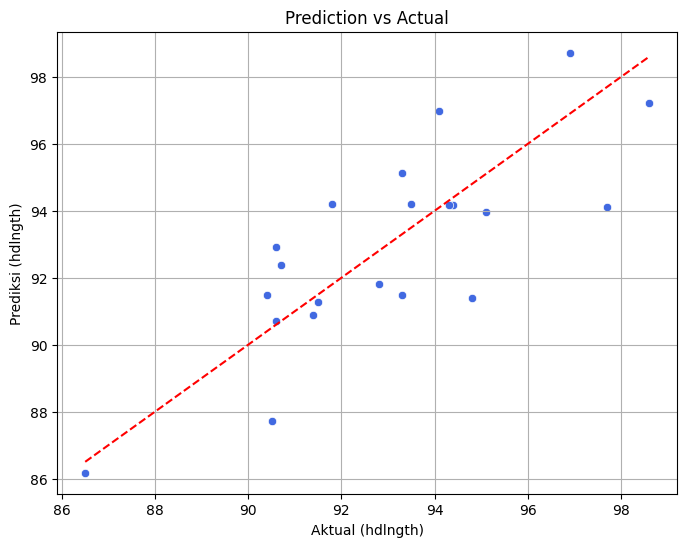

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel('Aktual (hdlngth)')
plt.ylabel('Prediksi (hdlngth)')
plt.title('Prediction vs Actual')
plt.grid(True)
plt.show()


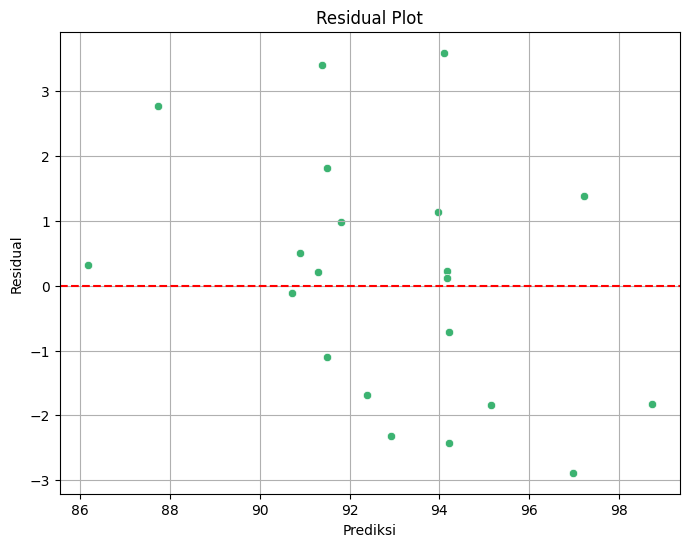

In [48]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='mediumseagreen')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Gunakan cross_val_score dengan scoring 'r2'
r2_scores = cross_val_score(
    linear_model, X_train_scaled, y_train, cv=5, scoring='r2'
)

# Tampilkan hasil
print("R-squared tiap fold (cv=5):", r2_scores)
print("R-squared rata-rata:", np.mean(r2_scores))
print(f"R-squared Standar deviasi {r2_scores.std():.4f}")

R-squared tiap fold (cv=5): [0.69170513 0.66924295 0.80230078 0.34719876 0.544259  ]
R-squared rata-rata: 0.6109413253022413
R-squared Standar deviasi 0.1553


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [75]:
# List alpha (nilai regularisasi)
alphas = [0.001, 0.01, 0.1, 1, 10]
alphas

[0.001, 0.01, 0.1, 1, 10]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary untuk menyimpan hasil evaluasi
lasso_results = []
lasso_models = {}

# Loop semua alpha
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Simpan model ke dictionary
    lasso_models[alpha] = model

    # Evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    lasso_results.append({
        'Alpha': alpha,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    })



c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [77]:
# Konversi ke DataFrame 
lasso_df = pd.DataFrame(lasso_results)

print("Hasil Evaluasi Lasso Regression:")
print(lasso_df)


Hasil Evaluasi Lasso Regression:
    Alpha       MAE       MSE      RMSE  R-squared
0   0.001  1.491850  3.375265  1.837189   0.556880
1   0.010  1.478780  3.366662  1.834846   0.558010
2   0.100  1.437904  3.865478  1.966082   0.492523
3   1.000  1.356839  4.053987  2.013452   0.467775
4  10.000  2.251692  7.852915  2.802305  -0.030965


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [78]:
# Temukan index alpha dengan R-squared tertinggi
best_index = lasso_df['R-squared'].idxmax()
best_alpha = lasso_df.loc[best_index, 'Alpha']

print(f"Alpha terbaik berdasarkan R-squared: {best_alpha}")

Alpha terbaik berdasarkan R-squared: 0.01


e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [79]:
# Fit model Lasso terbaik
best_lasso_model = Lasso(alpha=best_alpha, max_iter=10000)
best_lasso_model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
best_y_pred = best_lasso_model.predict(X_test_scaled)

print("Array hasil prediksi dari Lasso Regression terbaik:")
print(best_y_pred)


Array hasil prediksi dari Lasso Regression terbaik:
[91.93394216 91.4739792  94.18718829 98.75886718 90.91893138 94.0547748
 92.26516023 97.09068548 95.10357431 96.89907223 94.04563778 94.23814618
 93.90732111 91.31372956 86.22086074 91.32662812 92.93511759 90.75205642
 94.06241945 87.83347728 91.48362221]


In [80]:
pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': best_y_pred
})


,Actual,Predicted
0,92.8,91.933942
1,90.4,91.473979
2,93.5,94.187188
3,96.9,98.758867
4,91.4,90.918931
5,91.8,94.054775
6,90.7,92.265160
7,98.6,97.090685
8,93.3,95.103574
9,94.1,96.899072


f) Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

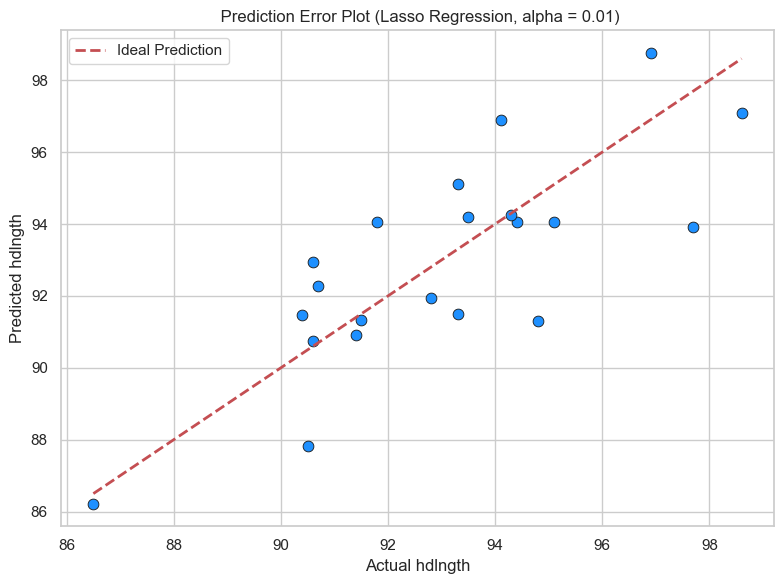

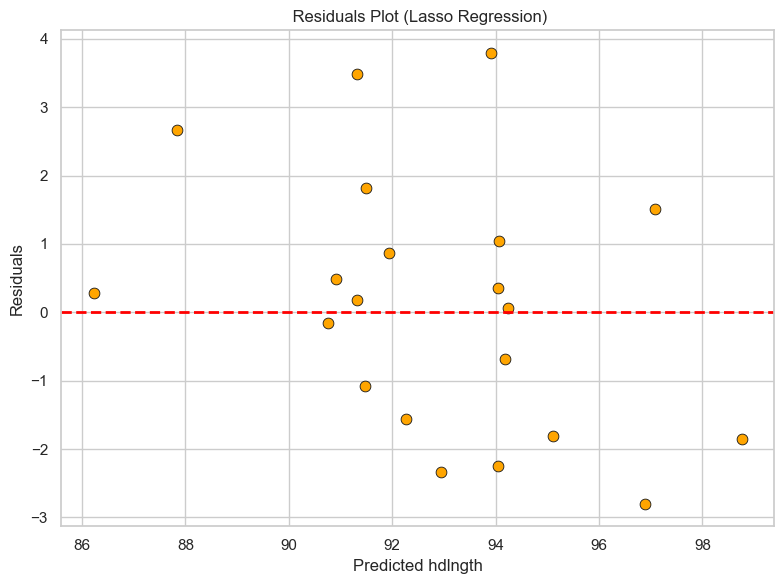

In [81]:
# Set style
sns.set(style="whitegrid")

# --- 1. Prediction Error Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_y_pred, color='dodgerblue', s=60, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.xlabel("Actual hdlngth")
plt.ylabel("Predicted hdlngth")
plt.title(" Prediction Error Plot (Lasso Regression, alpha = 0.01)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Residual Plot ---
residuals = y_test - best_y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=best_y_pred, y=residuals, color='orange', s=60, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted hdlngth")
plt.ylabel("Residuals")
plt.title(" Residuals Plot (Lasso Regression)")
plt.tight_layout()
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

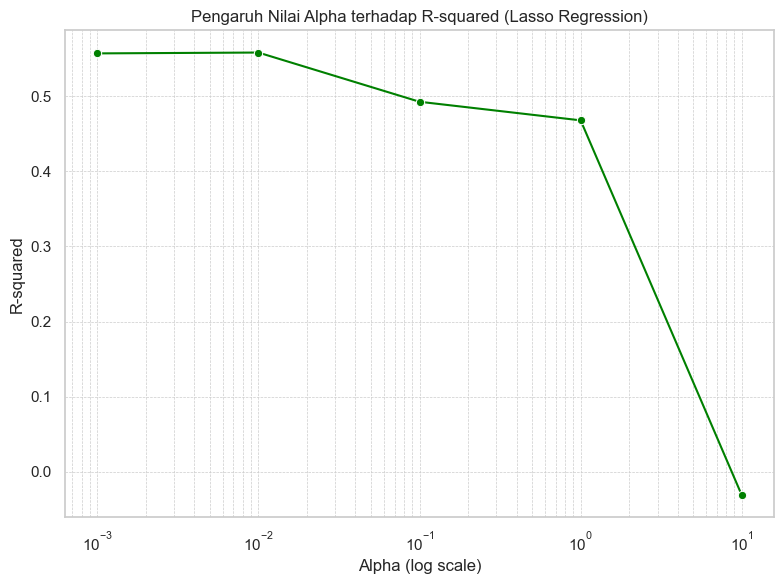

In [82]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=lasso_df, x='Alpha', y='R-squared', marker='o', color='green')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("R-squared")
plt.title("Pengaruh Nilai Alpha terhadap R-squared (Lasso Regression)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

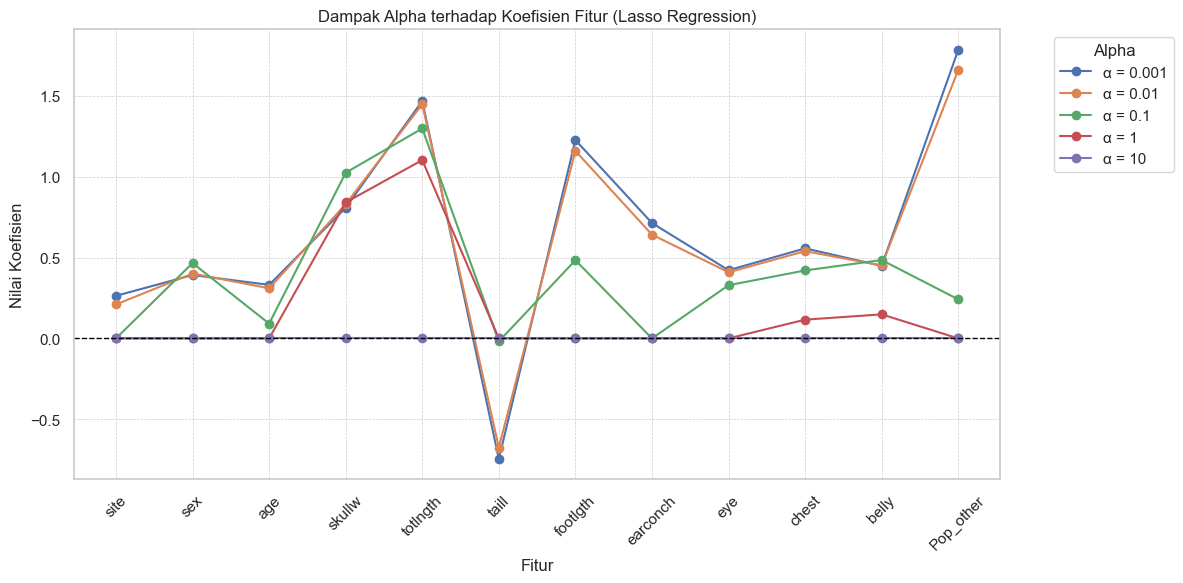

In [83]:
plt.figure(figsize=(12, 6))

# Plot setiap alpha dan koefisiennya
for alpha in alphas:
    model = lasso_models[alpha]
    plt.plot(X_train.columns, model.coef_, label=f'α = {alpha}', marker='o')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Dampak Alpha terhadap Koefisien Fitur (Lasso Regression)")
plt.xlabel("Fitur")
plt.ylabel("Nilai Koefisien")
plt.xticks(rotation=45)
plt.legend(title="Alpha", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


`JAWABAN`
Saat alpha terlalu kecil, model cenderung mendekati Linear Regression (regulasi lemah). Alpha 0.01 menghasilkan R-squared tertinggi, artinya keseimbangan antara fitting dan regularisasi paling optimal. Ketika alpha terlalu besar, model terlalu banyak menyusutkan koefisien → performa buruk, bahkan R-squared bisa negatif (lebih buruk dari mean predictor).

Alpha dalam Lasso berfungsi seperti "slider penyederhana model":

- Kecil → mempertahankan banyak fitur, akurasi tinggi tapi risiko overfit.

- Sedang → fitur tidak penting mulai di-nol-kan, model jadi lebih efisien.

- Besar → banyak fitur dihilangkan, model terlalu sederhana (underfit).

R-squared mencapai puncaknya pada alpha = 0.01, menunjukkan ini titik keseimbangan terbaik antara kompleksitas dan generalisasi.



#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [84]:
from sklearn.linear_model import Ridge

# List alpha (nilai regularisasi)
ridge_alphas = [0.001, 0.01, 0.1, 1, 10]
ridge_alphas

[0.001, 0.01, 0.1, 1, 10]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [85]:
# Dictionary untuk menyimpan model Ridge per alpha
ridge_models = {}

# List untuk menyimpan hasil evaluasi
ridge_results = []

# Looping untuk setiap alpha
for alpha in ridge_alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    
    # Simpan model ke dictionary
    ridge_models[alpha] = model
    
    # Prediksi data uji
    y_pred = model.predict(X_test_scaled)

    # Evaluasi performa
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    ridge_results.append({
        'Alpha': alpha,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    })

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [86]:
ridge_df = pd.DataFrame(ridge_results)
print("Hasil Evaluasi Ridge Regression:")
print(ridge_df)


Hasil Evaluasi Ridge Regression:
    Alpha       MAE       MSE      RMSE  R-squared
0   0.001  1.493287  3.377044  1.837673   0.556647
1   0.010  1.493193  3.377080  1.837683   0.556642
2   0.100  1.492295  3.377602  1.837825   0.556574
3   1.000  1.485956  3.394464  1.842407   0.554360
4  10.000  1.507315  3.687607  1.920314   0.515875


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [87]:
# Ubah list hasil evaluasi ke DataFrame
ridge_df = pd.DataFrame(ridge_results)

# Temukan index alpha dengan R-squared tertinggi
best_index = ridge_df['R-squared'].idxmax()
best_alpha = ridge_df.loc[best_index, 'Alpha']

print(f"Alpha terbaik berdasarkan R-squared: {best_alpha}")

Alpha terbaik berdasarkan R-squared: 0.001


e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [88]:
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
best_y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Cetak array prediksi
print("Array hasil prediksi dari Ridge Regression terbaik:")
print(best_y_pred_ridge)

Array hasil prediksi dari Ridge Regression terbaik:
[91.81934398 91.49797948 94.20926754 98.72500908 90.89023702 94.21856259
 92.38067522 97.21482522 95.13835353 96.98453643 94.17276407 94.17839738
 94.10402523 91.39489437 86.1737648  91.28973056 92.91747257 90.71001496
 93.96673596 87.73077805 91.48735638]


In [89]:
pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': best_y_pred_ridge
})


,Actual,Predicted
0,92.8,91.819344
1,90.4,91.497979
2,93.5,94.209268
3,96.9,98.725009
4,91.4,90.890237
5,91.8,94.218563
6,90.7,92.380675
7,98.6,97.214825
8,93.3,95.138354
9,94.1,96.984536


f) Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

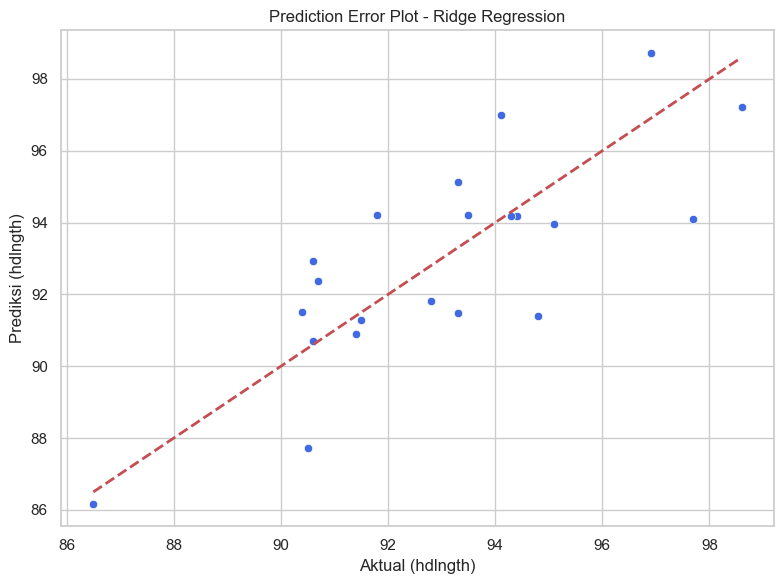

In [90]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_y_pred_ridge, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Aktual (hdlngth)")
plt.ylabel("Prediksi (hdlngth)")
plt.title("Prediction Error Plot - Ridge Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


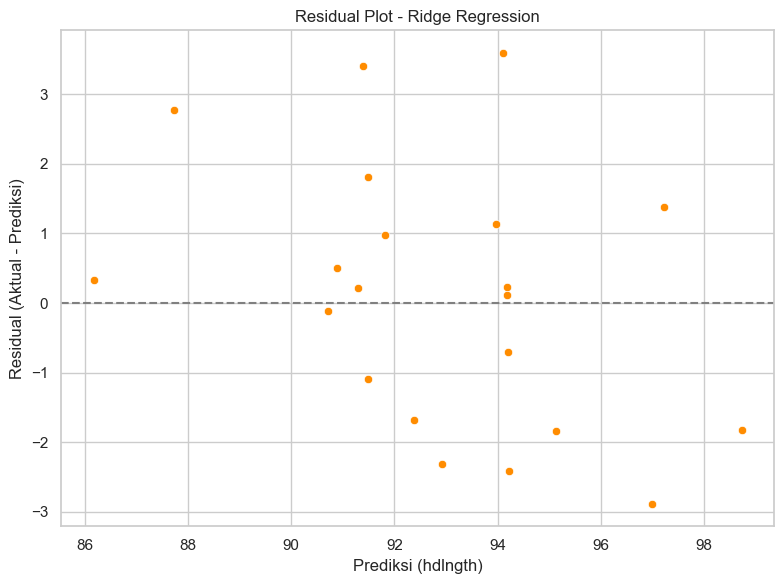

In [91]:
residuals = y_test - best_y_pred_ridge

plt.figure(figsize=(8, 6))
sns.scatterplot(x=best_y_pred_ridge, y=residuals, color='darkorange')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Prediksi (hdlngth)")
plt.ylabel("Residual (Aktual - Prediksi)")
plt.title("Residual Plot - Ridge Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


g) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

`JAWABAN`

Lasso regression dapat dijadikan model untuk feature selection karena karakteristik unik dari regulasi L1 yang dimilikinya. Regulasi ini bekerja dengan cara menambahkan penalti terhadap jumlah nilai absolut dari koefisien regresi, yang mendorong beberapa koefisien menjadi nol secara langsung. Artinya, fitur-fitur yang tidak terlalu berkontribusi terhadap prediksi akan dieliminasi dari model, sehingga hanya fitur-fitur yang paling relevan yang dipertahankan. Oleh karena itu, lasso tidak hanya melakukan regularisasi untuk mencegah overfitting, tetapi juga secara aktif memilih fitur yang penting.

Sebaliknya, ridge regression menggunakan regulasi L2, yang memberikan penalti terhadap jumlah kuadrat dari koefisien. Hal ini menyebabkan semua koefisien tetap berada di dalam model, meskipun mungkin menjadi sangat kecil. Dengan kata lain, ridge regression mengecilkan koefisien tetapi tidak pernah mengeliminasi fitur sepenuhnya. Oleh sebab itu, ridge tidak dapat digunakan secara langsung untuk feature selection, meskipun tetap berguna untuk menangani multikolinearitas dan meningkatkan generalisasi model.

Singkatnya, lasso cocok digunakan ketika kita ingin mendapatkan model yang lebih sederhana dengan hanya menyertakan fitur-fitur yang paling penting, sedangkan ridge lebih tepat untuk mengurangi kompleksitas model tanpa menghapus fitur apa pun.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

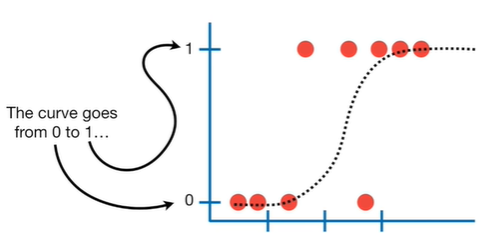

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

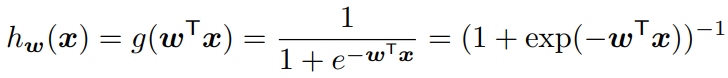

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

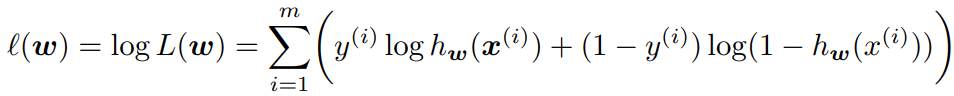

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.

In [92]:
# Membentuk data buatan
x1  = np.array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11])
x2  = np.array([ 2,  3,  4,  7,  7,  8,  9,  6,  5,  9])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  7]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9  6]
 [10  5]
 [11  9]]
y:  [0 0 0 1 1 1 1 0 0 1]


In [93]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [94]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[ 4,  5],
                   [ 4,  5]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [95]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[np.float64(-6.5384871385615275), np.float64(-0.28010415901938185), np.float64(1.3565489526055026)]


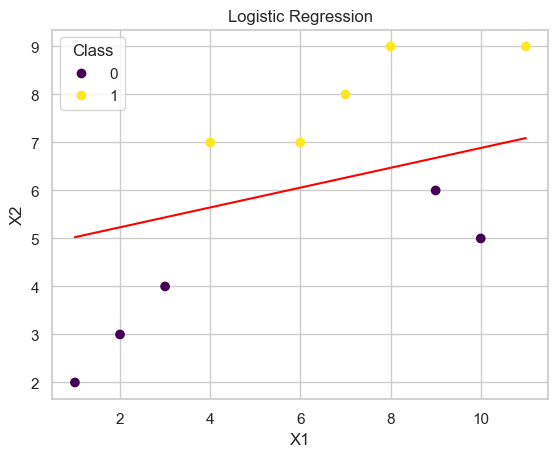

In [96]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [97]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


**Log Odds (Logit)**

Dalam regresi logistik sederhana, kita ingin memodelkan probabilitas suatu kejadian, biasanya dilambangkan dengan Y=1. Namun, probabilitas hanya bisa bernilai antara 0 dan 1, sedangkan model linear (seperti yang digunakan di sisi kanan persamaan regresi logistik) bisa menghasilkan nilai dari negatif tak hingga hingga positif tak hingga. Untuk menjembatani perbedaan ini, kita menggunakan fungsi logit.

Persamaan regresi logistik sederhana adalah:

$$logit[P(Y=1)] = β_0 + β_1 * X + error$$

* **P(Y=1)**: Probabilitas bahwa variabel Y bernilai 1.
* **β₀**: Intersep (konstanta).
* **β₁**: Koefisien slope.
* **X**: Variabel independen.
* **logit[P(Y=1)]**: Log odds dari P(Y=1).

Berikut adalah penjelasan tentang bagaimana koefisien mempengaruhi prediksi:

**1. Intercept (β₀ = -6.5385) Sangat Negatif**

  * Jika $x1$ dan $x2$ kecil (atau nol), nilai logit menjadi sangat negatif.
  * Artinya, probabilitas p mendekati nol, sehingga prediksi cenderung 0 (kejadian negatif).

**2. Koefisien β₁ = -0.2801 (Efek Negatif pada $x1$)**

  * Jika $x1$ meningkat, log-odds menurun.
  * Ini berarti **probabilitas kejadian positif menurun** → lebih mungkin memprediksi **kelas 0**.
  * Dampaknya relatif kecil karena nilai absolutnya tidak besar.

**3. Koefisien β₂ = 1.3565 (Efek Positif pada z2)**

  * Jika $x2$ meningkat, log-odds bertambah.
  * Ini berarti **probabilitas kejadian positif meningkat** → lebih mungkin memprediksi **kelas 1**.
  * Pengaruhnya cukup besar karena nilainya positif dan lebih besar dari β₁.

**Apa itu Odds?**

Odds adalah rasio probabilitas kejadian Y=1 terhadap probabilitas kejadian Y=0. Secara matematis:

$$Odds = \frac{P(Y=1)}{P(Y=0)}$$

Contoh: Jika probabilitas Y=1 adalah 0.8, maka probabilitas Y=0 adalah 1 - 0.8 = 0.2. Odds-nya adalah:

$$Odds = \frac{0.8}{0.2} = 4$$

Ini sering diungkapkan sebagai odds 4:1, yang berarti kejadian Y=1 empat kali lebih mungkin terjadi daripada kejadian Y=0.

**Apa itu Log Odds (Logit)?**

Log odds (logit) adalah logaritma natural (Ln) dari odds. Secara matematis:

$$Log odds = Ln(Odds) = Ln\left(\frac{P(Y=1)}{P(Y=0)}\right) = Ln\left(\frac{P(Y=1)}{1-P(Y=1)}\right)$$

**Mengapa Kita Menggunakan Log Odds?**

* **Transformasi Skala**: Log odds mengubah skala probabilitas (0 hingga 1) menjadi skala yang berkisar dari negatif tak hingga hingga positif tak hingga. Ini memungkinkan kita untuk menggunakan model linear untuk memodelkan probabilitas.
* **Menghubungkan Model Linear dengan Probabilitas**: Logit berfungsi sebagai fungsi penghubung (link function) antara nilai yang dihasilkan oleh sisi kanan model linear dan rentang nilai probabilitas.

**Proses Transformasi Skala:**

1.  **Probabilitas**: Nilai antara 0 dan 1.
2.  **Odds**: Nilai dari 0 hingga positif tak hingga.
3.  **Log Odds (Logit)**: Nilai dari negatif tak hingga hingga positif tak hingga.

Dengan menggunakan log odds, kita dapat memodelkan probabilitas kejadian Y=1 menggunakan model linear, yang memungkinkan kita untuk menganalisis hubungan antara variabel independen X dan probabilitas kejadian tersebut.

Untuk penjelasan lebih detail bisa lihat disini:
* https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html
* https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html
* https://heds.nz/posts/logistic-regression-python/
* https://www.pythonfordatascience.org/logistic-regression-python/

Berikut contoh penggunaan statsmodels untuk membantu kita menganalisis log odds.

In [98]:
import statsmodels.formula.api as smf

# Membentuk DataFrame untuk smf.logit
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_logistic_train})

# Membuat model logistik menggunakan statsmodels
reg = smf.logit("y ~ x1 + x2", data=df).fit()

# Menampilkan ringkasan model
print(reg.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        18:12:54   Log-Likelihood:            -6.6247e-11
converged:                      False   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                 0.0009766
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.2926   5.04e+05     -0.000      1.000   -9.89e+05    9.89e+05
x1            -8.8473    1.9e+05  -4.66e-05      1.000   -3.72e+0

/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, cat

Berikut adalah interpretasi dari hasil regresi logistik di atas:

1. **Intercept (β₀ = -97.2926) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), logit menjadi sangat negatif.  
   - Artinya, probabilitas kejadian positif (\( y=1 \)) mendekati nol, sehingga prediksi cenderung ke kelas 0.  

2. **Koefisien \( β₁ = -8.8473 \) (Efek Negatif pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds menurun drastis.  
   - Ini berarti probabilitas kejadian positif menurun → lebih cenderung memprediksi kelas 0.  
   - Namun, nilai ini tidak dapat diinterpretasikan dengan baik karena standard error sangat besar.  

3. **Koefisien \( β₂ = 24.9756 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds bertambah besar.  
   - Ini berarti probabilitas kejadian positif meningkat → lebih cenderung memprediksi kelas 1.  
   - Namun, adanya separasi sempurna membuat nilai ini tidak dapat diandalkan.

In [99]:
# Menghitung odds ratio dan interval kepercayaan
odds_ratio = np.exp(reg.params)

# Menampilkan odds ratio dan interval kepercayaan
print("\nOdds Ratio:")
print(odds_ratio)


Odds Ratio:
Intercept    5.576218e-43
x1           1.437753e-04
x2           7.026754e+10
dtype: float64


- **$x1$ memiliki dampak negatif yang sangat kuat terhadap peluang kejadian positif.** Jika $x1$ meningkat, kemungkinan $y=1$ akan berkurang drastis.  
- **$x2$ memiliki dampak positif yang sangat besar terhadap peluang kejadian positif.** Jika $x2$ meningkat, kemungkinan $y=1$ akan meningkat sangat signifikan.  
- **Model mengalami separasi sempurna**, karena odds ratio sangat ekstrem ($x1$ sangat kecil, $x2$ sangat besar). Hal ini bisa menyebabkan **overfitting** dan hasil regresi tidak bisa diandalkan untuk prediksi generalisasi. Namun, untuk contoh ini data memang dibuat demikian agar lebih mudah dimengerti.

### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada analisis prediksi penyakit Alzheimer adalah data kesehatan komprehensif dari 2.149 pasien, dengan informasi mendetail mengenai demografi, gaya hidup, riwayat medis, pengukuran klinis, penilaian kognitif dan fungsional, gejala, serta status diagnosis Alzheimer. Dataset ini ideal untuk mengeksplorasi faktor-faktor yang berhubungan dengan Alzheimer, mengembangkan model prediktif, dan melakukan analisis statistik.

**Fitur dalam dataset:**  
1. **PatientID**: Identifikasi unik setiap pasien (4751 hingga 6900).  
2. **Age**: Usia pasien (60 – 90 tahun).  
3. **Gender**: Jenis kelamin pasien, di mana 0 untuk Laki-laki dan 1 untuk Perempuan.  
4. **Ethnicity**: Etnisitas pasien, dengan kode: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other.  
5. **EducationLevel**: Tingkat pendidikan pasien, dengan kode: 0 = None, 1 = High School, 2 = Bachelor's, 3 = Higher.  
6. **BMI**: Body Mass Index pasien, berkisar antara 15 hingga 40.  
7. **Smoking**: Status merokok, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.  
8. **AlcoholConsumption**: Konsumsi alkohol mingguan dalam unit (0 – 20 unit).  
9. **PhysicalActivity**: Durasi aktivitas fisik mingguan (0 – 10 jam).  
10. **DietQuality**: Skor kualitas diet, berkisar antara 0 hingga 10.  
11. **SleepQuality**: Skor kualitas tidur, berkisar antara 4 hingga 10.  
12. **FamilyHistoryAlzheimers**: Riwayat keluarga dengan Alzheimer, di mana 0 = Tidak dan 1 = Ya.  
13. **CardiovascularDisease**: Keberadaan penyakit kardiovaskular, di mana 0 = Tidak dan 1 = Ya.  
14. **Diabetes**: Keberadaan diabetes, di mana 0 = Tidak dan 1 = Ya.  
15. **Depression**: Keberadaan depresi, di mana 0 = Tidak dan 1 = Ya.  
16. **HeadInjury**: Riwayat cedera kepala, di mana 0 = Tidak dan 1 = Ya.  
17. **Hypertension**: Keberadaan hipertensi, di mana 0 = Tidak dan 1 = Ya.  
18. **SystolicBP**: Tekanan darah sistolik (90 – 180 mmHg).  
19. **DiastolicBP**: Tekanan darah diastolik (60 – 120 mmHg).  
20. **CholesterolTotal**: Kadar kolesterol total (150 – 300 mg/dL).  
21. **CholesterolLDL**: Kadar kolesterol LDL (50 – 200 mg/dL).  
22. **CholesterolHDL**: Kadar kolesterol HDL (20 – 100 mg/dL).  
23. **CholesterolTriglycerides**: Kadar trigliserida (50 – 400 mg/dL).  
24. **MMSE**: Skor Mini-Mental State Examination (0 – 30); skor lebih rendah mengindikasikan gangguan kognitif.  
25. **FunctionalAssessment**: Skor penilaian fungsional (0 – 10); skor lebih rendah menunjukkan penurunan fungsi yang lebih signifikan.  
26. **MemoryComplaints**: Keluhan mengenai ingatan, di mana 0 = Tidak dan 1 = Ya.  
27. **BehavioralProblems**: Gangguan perilaku, di mana 0 = Tidak dan 1 = Ya.  
28. **ADL**: Skor Activities of Daily Living (0 – 10); skor lebih rendah mengindikasikan penurunan kemampuan melakukan aktivitas harian.  
29. **Confusion**: Kondisi bingung, di mana 0 = Tidak dan 1 = Ya.  
30. **Disorientation**: Kondisi tidak terorientasi, di mana 0 = Tidak dan 1 = Ya.  
31. **PersonalityChanges**: Perubahan kepribadian, di mana 0 = Tidak dan 1 = Ya.  
32. **DifficultyCompletingTasks**: Kesulitan dalam menyelesaikan tugas, di mana 0 = Tidak dan 1 = Ya.  
33. **Forgetfulness**: Kondisi sering lupa, di mana 0 = Tidak dan 1 = Ya.  
34. **Diagnosis**: Status diagnosis Alzheimer, di mana 0 menunjukkan tidak ada Alzheimer dan 1 menunjukkan adanya Alzheimer.  
35. **DoctorInCharge**: Informasi rahasia mengenai dokter penanggung jawab (selalu bernilai "XXXConfid" untuk setiap pasien).

**Target variabel:**  
- **Diagnosis**: Status diagnosis Alzheimer (0 = Tidak, 1 = Ya).

**Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [100]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_alzheimer = pd.read_csv('alzheimers_disease_data.csv')
df_alzheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [101]:
df_alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

#### Soal 5: Logistic Regression

a) Lakukan drop kolom yang tidak penting pada dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [105]:
# drop kolom tidak penting
df_alzheimer.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

# Pisahkan fitur dan target
X = df_alzheimer.drop(columns='Diagnosis')  # Fitur
y = df_alzheimer['Diagnosis']               # Target

# Split dataset menjadi training dan testing (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify menjaga proporsi label
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (1719, 32)
Testing set: (430, 32)


b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik. Atau bisa coba menggunakan solver lain seperti "saga" atau "liblinear"

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    f1_score, precision_score, recall_score
)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Scaling fitur (Logistic Regression sensitif terhadap skala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


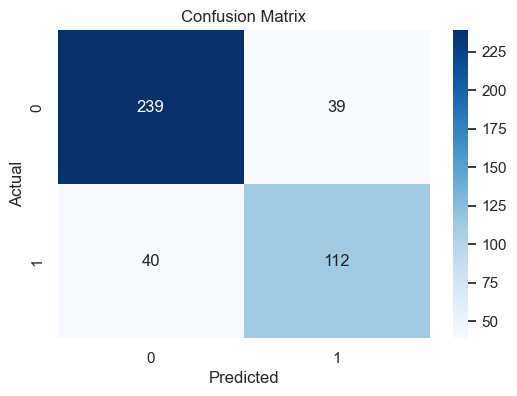

In [110]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')  # Bisa ganti solver jika perlu
logreg.fit(X_train_scaled, y_train)

# Prediksi
y_pred = logreg.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [111]:
# Evaluasi metrik
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')

recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print hasil metrik evaluasi
print("F1 Macro Average     :", round(f1_macro, 4))
print("F1 Micro Average     :", round(f1_micro, 4))
print("Precision Macro Avg  :", round(precision_macro, 4))
print("Precision Micro Avg  :", round(precision_micro, 4))
print("Recall Macro Average :", round(recall_macro, 4))
print("Recall Micro Average :", round(recall_micro, 4))

F1 Macro Average     : 0.7987
F1 Micro Average     : 0.8163
Precision Macro Avg  : 0.7992
Precision Micro Avg  : 0.8163
Recall Macro Average : 0.7983
Recall Micro Average : 0.8163


c) Berdasarkan pemahaman Anda mengenai penyakit Alzheimer, fitur-fitur apa saja yang menurut Anda memiliki pengaruh signifikan dalam memprediksi apakah seseorang mengidap Alzheimer? Sebutkan minimal lima fitur dan jelaskan alasan pemilihannya!

1. MMSE (Mini-Mental State Examination)
Alasan: Ini adalah alat skrining kognitif yang paling umum digunakan untuk menilai tingkat gangguan kognitif. Skor MMSE yang rendah sangat sering dikaitkan dengan penurunan fungsi otak, termasuk yang disebabkan oleh Alzheimer.

2. FunctionalAssessment
Alasan: Alzheimer bukan hanya menyerang ingatan, tetapi juga fungsi sehari-hari. Penurunan skor dalam penilaian fungsional biasanya menunjukkan ketidakmampuan dalam merawat diri, yang merupakan tanda khas Alzheimer di tahap lanjut.

3. Forgetfulness
Alasan: Lupa adalah gejala klasik dan awal dari Alzheimer. Walaupun bisa disebabkan oleh faktor lain, forgetfulness yang konsisten dan memburuk seringkali menjadi indikator dini penyakit ini.

4. Age
Alasan: Usia adalah faktor risiko utama untuk Alzheimer. Semakin tua seseorang, semakin besar risiko mengidap penyakit ini. Sebagian besar kasus terjadi pada usia 65 tahun ke atas.

5. FamilyHistoryAlzheimers
Alasan: Faktor genetik sangat berpengaruh. Jika seseorang memiliki riwayat keluarga dengan Alzheimer, risiko mereka untuk mengembangkan penyakit ini akan meningkat secara signifikan.

In [112]:
feature_names = X.columns
coefficients = logreg.coef_[0]

# Buat DataFrame untuk melihat pengaruh tiap fitur
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
})

# Urutkan berdasarkan pengaruh absolut
coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Tampilkan 10 fitur paling berpengaruh
print("Fitur-fitur dengan pengaruh terbesar terhadap diagnosis Alzheimer:")
print(coef_df_sorted[['Feature', 'Coefficient']].head(10))


Fitur-fitur dengan pengaruh terbesar terhadap diagnosis Alzheimer:
                     Feature  Coefficient
23      FunctionalAssessment    -1.318466
26                       ADL    -1.270346
24          MemoryComplaints     1.137161
25        BehavioralProblems     0.927754
22                      MMSE    -0.859564
20            CholesterolHDL     0.150081
19            CholesterolLDL    -0.149973
0                        Age    -0.135385
14                HeadInjury    -0.115290
21  CholesterolTriglycerides     0.106148


Namun dapat dilihat berdasarkan AbsCoefficient (besar pengaruh terlepas dari arah). Didapat 5 fitur dengan pengaruh terbesar adalah FunctionalAssessment, ADL, MemoryComplaints, BehavioralProblems, MMSE. Beberapa fitur juga beririsan dengan fitur yang saya berikan sebelumnya.

d) Buatlah masing-masing 1 model regresi logistik menggunakan fitur-fitur yang telah Anda pilih sebelumnya (min. 5 model). Hitung odds ratio untuk setiap fitur tersebut dan berikan interpretasi mengenai bagaimana masing-masing fitur memengaruhi probabilitas seseorang mengidap Alzheimer!
Hint: https://heds.nz/posts/logistic-regression-python/

In [114]:
import statsmodels.formula.api as smf

# referensi : https://heds.nz/posts/logistic-regression-python/
fitur_terpilih = ['FunctionalAssessment', 'ADL', 'MemoryComplaints', 'BehavioralProblems', 'MMSE']
results = []

for fitur in fitur_terpilih:
    print(f"\nModel: Diagnosis ~ {fitur}")
    formula = f'Diagnosis ~ {fitur}'
    
    # Fit model
    model = smf.logit(formula, data=df_alzheimer).fit(disp=False)  # disp=False agar tidak terlalu banyak output
    
    # Summary singkat
    print(model.summary())
    
    # Odds ratio
    odds_ratio = np.exp(model.params)
    print("\nOdds Ratio:")
    print(odds_ratio)
    
    # Confidence interval dan OR
    conf = model.conf_int()
    conf['OR'] = model.params
    conf.columns = ['Lower CI', 'Upper CI', 'OR']
    conf_exp = np.exp(conf)
    print("\nConfidence Interval & OR:")
    print(conf_exp)
    
    # Simpan hasil ke list (untuk tabulasi nanti)
    results.append({
        'Feature': fitur,
        'Odds Ratio': round(odds_ratio[1], 4),
        'Lower CI': round(conf_exp.iloc[1, 0], 4),
        'Upper CI': round(conf_exp.iloc[1, 1], 4),
        'Interpretation': ''  # Akan kita isi setelahnya
    })


Model: Diagnosis ~ FunctionalAssessment
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.1073
Time:                        22:12:41   Log-Likelihood:                -1246.4
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 4.014e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.7743      0.094      8.273      0.000       0.591       0.958
FunctionalAssessment    -0.2905      0.018    -16.082      0

/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_12438/4204554568.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Odds Ratio': round(odds_ratio[1], 4),
/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_12438/4204554568.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Odds Ratio': round(odds_ratio[1], 4),
/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_12438/4204554568.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by pos

Fitur Perlindungan (Protective Factors):

- FunctionalAssessment, ADL, dan MMSE semuanya memiliki OR < 1, yang berarti semakin baik kemampuan fungsional, aktivitas harian, atau skor kognitif seseorang, maka risiko terkena Alzheimer menurun.

- Terutama FunctionalAssessment dan ADL, menunjukkan efek perlindungan yang kuat (OR sekitar 0.75).

Fitur Risiko (Risk Factors):

- MemoryComplaints dan BehavioralProblems menunjukkan OR jauh > 1, artinya jika seseorang menunjukkan keluhan memori atau masalah perilaku, maka probabilitas terkena Alzheimer meningkat signifikan.

- MemoryComplaints adalah indikator paling kuat dalam model ini (OR = 4.6), menunjukkan bahwa keluhan terhadap memori merupakan sinyal penting untuk diagnosis Alzheimer.

Signifikansi Statistik:

- Semua fitur memiliki p-value < 0.001, artinya bermakna secara statistik dalam model prediksi Alzheimer (hasil konsisten dan bukan kebetulan).

e) Gunakan fitur-fitur yang paling berpengaruh berdasarkan analisis sebelumnya untuk membangun model akhir (1 model gabungan dari semua fitur penting). Pastikan model ini mempertimbangkan kemungkinan faktor confounding dan interaksi antar variabel.

In [120]:
# referensi : https://heds.nz/posts/logistic-regression-python/
# Model logistik akhir dengan interaksi
formula = 'Diagnosis ~ FunctionalAssessment + ADL + MemoryComplaints + BehavioralProblems + MMSE + \
           MemoryComplaints:BehavioralProblems + FunctionalAssessment:ADL'

model_final = smf.logit(formula=formula, data=df_alzheimer).fit()
print(model_final.summary())

# Hitung odds ratio dan CI-nya
params = model_final.params
conf = model_final.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
print("\nOdds Ratio & Confidence Intervals:")
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.368436
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                            7
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.4329
Time:                        22:25:37   Log-Likelihood:                -791.77
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                8.906e-257
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.7888      0.314 

f) Jelaskan interpretasi Anda terhadap hasil model final yang telah dibuat!

`JAWABAN:`

Model logistik final menunjukkan bahwa beberapa variabel memiliki pengaruh signifikan terhadap kemungkinan seseorang didiagnosis dengan Alzheimer. Dua faktor yang paling kuat adalah *MemoryComplaints* (keluhan memori) dan *BehavioralProblems* (masalah perilaku). Individu yang mengalami keluhan memori memiliki peluang sekitar 14 kali lebih besar untuk didiagnosis Alzheimer, sementara mereka yang menunjukkan masalah perilaku memiliki kemungkinan sekitar 12 kali lebih besar dibandingkan dengan mereka yang tidak memiliki gejala tersebut. Selain itu, skor *FunctionalAssessment* dan *ADL* (kemampuan menjalani aktivitas sehari-hari) yang lebih tinggi, yang menunjukkan fungsi kognitif dan fisik yang lebih baik, justru menurunkan risiko diagnosis Alzheimer secara signifikan. Hal ini mencerminkan bahwa semakin mandiri dan fungsional seseorang dalam kehidupan sehari-hari, semakin kecil kemungkinan mereka mengidap Alzheimer.

Fitur *MMSE* (Mini-Mental State Examination), yang mengukur fungsi kognitif secara umum, juga memberikan kontribusi penting: setiap peningkatan skor MMSE dikaitkan dengan penurunan peluang diagnosis Alzheimer sekitar 10%. Selain pengaruh individual, interaksi antar variabel juga dipertimbangkan dalam model. Meskipun interaksi antara *MemoryComplaints* dan *BehavioralProblems* tidak signifikan secara statistik, interaksi antara *FunctionalAssessment* dan *ADL* menunjukkan efek protektif tambahan yang signifikan, memperkuat temuan bahwa kemampuan fungsional yang baik sangat penting. Secara keseluruhan, model ini secara statistik signifikan dan memiliki performa prediktif yang baik, dengan nilai Pseudo R² sebesar 0.43, menandakan model menjelaskan proporsi variasi diagnosis Alzheimer yang cukup besar.

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

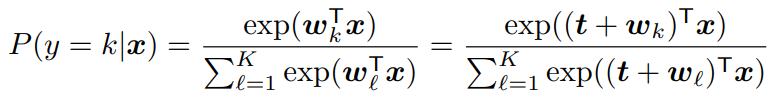

Persamaan likelihood softmaxe regression:

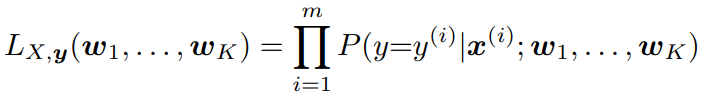

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [121]:
# Membentuk data buatan
x1  = np.array([1, 1, 2, 6, 2, 6, 7, 2, 3, 6])
x2  = np.array([2, 10, 8, 7, 9, 9, 5, 1, 1, 8])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train = np.array([0, 1, 1, 2, 1, 2, 2, 0, 0, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[ 1  2]
 [ 1 10]
 [ 2  8]
 [ 6  7]
 [ 2  9]
 [ 6  9]
 [ 7  5]
 [ 2  1]
 [ 3  1]
 [ 6  8]]
y:  [0 1 1 2 1 2 2 0 0 2]


In [122]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set
softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [123]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan
X_test = np.array([[3, 4], [6, 7]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)
print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [124]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.14189026 -0.82066722 -3.32122304] [[-0.23982067 -0.61975393]
 [-0.56153891  0.47452284]
 [ 0.80135958  0.14523109]]


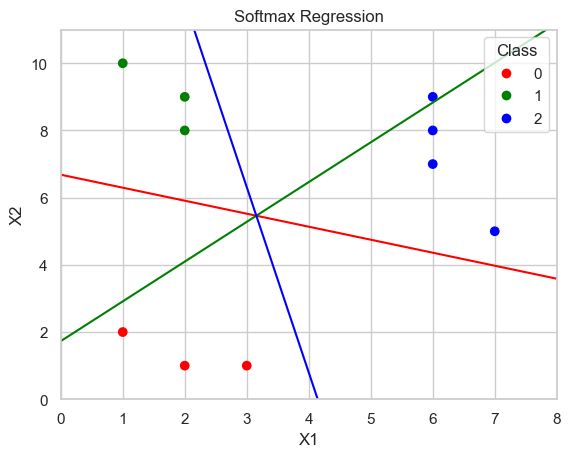

In [125]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

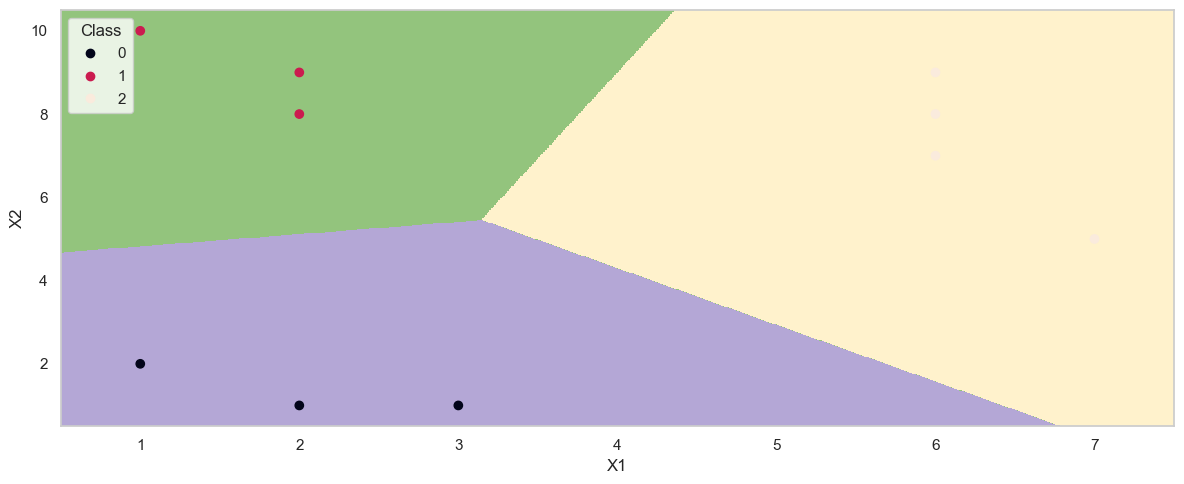

In [126]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [127]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


**Log Odds**

Berikut contoh penggunaan statsmodels untuk membantu kita menganalisis log odds.
https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [128]:
import statsmodels.api as sm

# Data contoh
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y_softmax_train
})

# Membuat model regresi softmax (logistik multinomial)
reg = sm.MNLogit(data['y'], sm.add_constant(data[['x1', 'x2']])).fit()

# Menampilkan ringkasan model
print(reg.summary())


         Current function value: 0.000000
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   10
Model:                        MNLogit   Df Residuals:                        4
Method:                           MLE   Df Model:                            4
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        22:28:00   Log-Likelihood:            -1.0951e-06
converged:                      False   LL-Null:                       -10.889
Covariance Type:            nonrobust   LLR p-value:                 0.0002219
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.4120   2.06e+06  -2.16e-05      1.000   -4.03e+06    4.03e+06
x1             0.2326   4.64e+05   5.01e-07      1.000    -9.1e+0

/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Berikut adalah interpretasi dari hasil regresi logistik multinomial di atas:

**Kelas \( y=1 \) dibandingkan dengan \( y=0 \)**
1. **Intercept (β₀ = -44.4133) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), logit menjadi sangat negatif.  
   - Artinya, probabilitas kejadian \( y=1 \) mendekati nol, sehingga prediksi cenderung ke kelas 0.  

2. **Koefisien \( β₁ = 0.2328 \) (Efek Kecil pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds meningkat sedikit.  
   - Ini berarti probabilitas kejadian \( y=1 \) meningkat, tetapi dampaknya sangat kecil.  
   - Standard error yang besar menunjukkan nilai ini **tidak dapat diinterpretasikan dengan baik**.  

3. **Koefisien \( β₂ = 7.7959 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds bertambah signifikan.  
   - Ini berarti probabilitas kejadian \( y=1 \) meningkat secara drastis.  
   - Namun, standard error yang besar menunjukkan **hasil ini tidak stabil**.  

---

**Kelas \( y=2 \) dibandingkan dengan \( y=0 \)**
1. **Intercept (β₀ = -78.1020) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), probabilitas kejadian \( y=2 \) hampir nol.  
   - Model sangat cenderung memprediksi kelas 0 dalam kondisi ini.  

2. **Koefisien \( β₁ = 9.7740 \) (Efek Positif pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds bertambah signifikan.  
   - Ini berarti probabilitas kejadian \( y=2 \) meningkat cukup drastis.  
   - Namun, standard error yang sangat besar membuat nilai ini **tidak dapat diinterpretasikan dengan baik**.  

3. **Koefisien \( β₂ = 7.8169 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds meningkat cukup signifikan.  
   - Ini berarti probabilitas kejadian \( y=2 \) meningkat.  
   - Namun, seperti sebelumnya, standard error yang sangat besar menunjukkan **hasil ini tidak stabil**.

In [129]:
# Menghitung odds ratio dan interval kepercayaan
odds_ratio = np.exp(reg.params)

# Menampilkan odds ratio dan interval kepercayaan
print("Odds Ratio:")
print(odds_ratio)

Odds Ratio:
                  0             1
const  5.153466e-20  1.205976e-34
x1     1.261897e+00  1.756842e+04
x2     2.430327e+03  2.481995e+03


**Kelas \( y=1 \) dibandingkan dengan \( y=0 \)**  
1. **Intercept (OR = \( 5.15 \times 10^{-20} \)) → Sangat Kecil**  
   - Jika \( x1 \) dan \( x2 \) bernilai nol, peluang kejadian \( y=1 \) dibandingkan dengan \( y=0 \) **hampir nol**.  
   - Artinya, dalam kondisi dasar (tanpa faktor \( x1 \) dan \( x2 \)), model sangat cenderung memprediksi kelas **\( y=0 \)**.  

2. **Koefisien \( x1 \) (OR = 1.26) → Efek Kecil**  
   - Jika \( x1 \) meningkat **1 unit**, peluang kejadian \( y=1 \) dibandingkan \( y=0 \) naik **26,2%**.  
   - Namun, efeknya relatif kecil dibandingkan dengan \( x2 \).  

3. **Koefisien \( x2 \) (OR = 2,430.62) → Efek Sangat Besar**  
   - Jika \( x2 \) meningkat **1 unit**, peluang kejadian \( y=1 \) dibandingkan \( y=0 \) meningkat sekitar **2,431 kali lipat**.  
   - Ini menunjukkan bahwa **\( x2 \) adalah prediktor utama dalam membedakan kelas \( y=1 \) dari \( y=0 \)**.  

---

**Kelas \( y=2 \) dibandingkan dengan \( y=0 \)**  
1. **Intercept (OR = \( 1.20 \times 10^{-34} \)) → Sangat Kecil**  
   - Jika \( x1 \) dan \( x2 \) bernilai nol, peluang kejadian \( y=2 \) dibandingkan dengan \( y=0 \) **hampir nol**.  
   - Model cenderung sangat sulit memprediksi kelas \( y=2 \) tanpa faktor lainnya.  

2. **Koefisien \( x1 \) (OR = 17,571.56) → Efek Sangat Besar**  
   - Jika \( x1 \) meningkat **1 unit**, peluang kejadian \( y=2 \) dibandingkan \( y=0 \) meningkat **17,571 kali lipat**.  
   - Ini menunjukkan bahwa **\( x1 \) adalah faktor yang sangat berpengaruh dalam membedakan kelas \( y=2 \) dari \( y=0 \)**.  

3. **Koefisien \( x2 \) (OR = 2,482.32) → Efek Sangat Besar**  
   - Jika \( x2 \) meningkat **1 unit**, peluang kejadian \( y=2 \) dibandingkan \( y=0 \) meningkat sekitar **2,482 kali lipat**.  
   - Sama seperti pada \( y=1 \), \( x2 \) sangat mempengaruhi prediksi model.  

---

**Kesimpulan**  
- **\( x2 \) adalah prediktor utama** dalam membedakan kelas \( y=1 \) dan \( y=2 \) dari \( y=0 \).  
- **\( x1 \) memiliki dampak lebih kuat pada \( y=2 \) dibandingkan \( y=1 \)** (OR jauh lebih tinggi di kelas \( y=2 \)).  
- **Intercept yang sangat kecil** menunjukkan model sangat jarang memprediksi kelas selain \( y=0 \) dalam kondisi dasar.  
- **Odds Ratio yang sangat besar dapat mengindikasikan separasi sempurna**, sehingga perlu dilakukan evaluasi lebih lanjut terhadap model.

### Penjelasan Dataset untuk *Softmax Regression*

Dataset ini berisi data dari institusi pendidikan tinggi mengenai berbagai variabel yang berkaitan dengan mahasiswa sarjana, termasuk faktor demografi, sosial-ekonomi, dan kinerja akademik. Data ini digunakan untuk menganalisis dampak berbagai faktor terhadap keberhasilan akademik dan kemungkinan mahasiswa untuk bertahan atau putus kuliah.  

### **Fitur dalam dataset:**  
1. **Marital status**: Status pernikahan mahasiswa. (Kategorikal)  
2. **Application mode**: Metode yang digunakan mahasiswa untuk mendaftar. (Kategorikal)  
3. **Application order**: Urutan aplikasi mahasiswa dalam proses penerimaan. (Numerikal)  
4. **Course**: Program studi yang diambil oleh mahasiswa. (Kategorikal)  
5. **Daytime/evening attendance**: Kategori kehadiran mahasiswa, apakah menghadiri kelas di siang atau malam hari. (Kategorikal)  
6. **Previous qualification**: Kualifikasi pendidikan yang diperoleh mahasiswa sebelum masuk perguruan tinggi. (Kategorikal)  
7. **Nationality**: Kewarganegaraan mahasiswa. (Kategorikal)  
8. **Mother's qualification**: Tingkat pendidikan ibu mahasiswa. (Kategorikal)  
9. **Father's qualification**: Tingkat pendidikan ayah mahasiswa. (Kategorikal)  
10. **Mother's occupation**: Pekerjaan ibu mahasiswa. (Kategorikal)  
11. **Father's occupation**: Pekerjaan ayah mahasiswa. (Kategorikal)  
12. **Displaced**: Status apakah mahasiswa termasuk dalam kelompok yang mengungsi atau berpindah tempat. (Kategorikal)  
13. **Educational special needs**: Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorikal)  
14. **Debtor**: Status apakah mahasiswa memiliki utang akademik. (Kategorikal)  
15. **Tuition fees up to date**: Status apakah mahasiswa telah membayar biaya kuliah tepat waktu. (Kategorikal)  
16. **Gender**: Jenis kelamin mahasiswa. (Kategorikal)  
17. **Scholarship holder**: Apakah mahasiswa menerima beasiswa. (Kategorikal)  
18. **Age at enrollment**: Usia mahasiswa saat pertama kali mendaftar di institusi pendidikan tinggi. (Numerikal)  
19. **International**: Status apakah mahasiswa merupakan mahasiswa internasional. (Kategorikal)  
20. **Curricular units 1st sem (credited)**: Jumlah mata kuliah yang dikreditkan oleh mahasiswa pada semester pertama. (Numerikal)  
21. **Curricular units 1st sem (enrolled)**: Jumlah mata kuliah yang diambil mahasiswa pada semester pertama. (Numerikal)  
22. **Curricular units 1st sem (evaluations)**: Jumlah mata kuliah yang dievaluasi mahasiswa pada semester pertama. (Numerikal)  
23. **Curricular units 1st sem (approved)**: Jumlah mata kuliah yang diselesaikan dengan sukses oleh mahasiswa pada semester pertama. (Numerikal)  

### **Target Variabel:**  
- **Target**: Status mahasiswa apakah bertahan, lulus, atau drop out dari institusi pendidikan tinggi. ('Dropout', 'Graduate', 'Enrolled')

### **Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention


In [130]:
import pandas as pd

# Import dataset stars dan menampilkan 5 row teratas
df_students = pd.read_csv('students.csv')

df_students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [131]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [132]:
df_students['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [133]:
# Melakukan encoding pada tiap label
df_students["Target"] = df_students["Target"].map({
    "Dropout": 0,
    "Graduate": 1,
    "Enrolled": 2,
})

df_students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=32` untuk splitting data.

In [134]:
X = df_students.drop(columns=["Target"])
y = df_students["Target"]

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=32, stratify=y
)

# Cek bentuk data setelah split
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)

Ukuran X_train: (3539, 34)
Ukuran X_test: (885, 34)


b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [136]:
from sklearn.preprocessing import StandardScaler

# Kolom kategorikal (berdasarkan deskripsi)
categorical_cols = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation",
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]

# Kolom numerik = semua kecuali kategorikal + Target
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Inisialisasi scaler
scaler = StandardScaler()

# Fit scaler pada training set numerik, lalu transform
X_train_scaled_num = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled_num = scaler.transform(X_test[numeric_cols])

# Konversi kembali ke DataFrame dengan kolom aslinya
import pandas as pd

X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns=numeric_cols, index=X_train.index)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns=numeric_cols, index=X_test.index)

# Gabungkan kembali dengan kolom kategorikal (tidak diubah)
X_train_final = pd.concat([X_train_scaled_num, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_num, X_test[categorical_cols]], axis=1)

display(X_train_final.head())
display(X_test_final.head())

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
3311,0.196771,-0.694725,-0.299198,-0.109347,-0.074808,0.419799,1.108259,-0.196413,-0.283012,-0.106240,...,30,4,8,1,0,0,1,0,0,0
2809,0.950422,-0.560908,-0.299198,0.295866,0.881821,-0.224882,0.566514,-0.196413,-0.283012,0.350049,...,14,17,40,1,0,0,1,0,0,0
4132,-0.556879,-0.293272,2.654982,2.321932,2.316764,1.064480,0.334337,-0.196413,1.787439,2.631491,...,28,3,10,1,0,0,1,0,0,0
2287,-0.556879,-0.159454,-0.299198,-0.109347,-0.074808,0.419799,0.618109,-0.196413,-0.283012,-0.106240,...,1,4,4,0,0,0,1,1,1,0
260,-0.556879,-0.427090,-0.299198,-0.109347,-0.074808,0.419799,0.110760,-0.196413,-0.283012,-0.106240,...,28,10,8,0,0,0,1,0,1,0


,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
3001,0.196771,-0.560908,-0.299198,0.295866,0.164349,0.742139,0.576260,-0.196413,-0.283012,0.806337,...,1,3,11,1,0,0,1,0,0,0
251,0.950422,-0.694725,-0.299198,-0.109347,-0.553123,0.419799,0.901880,-0.196413,-0.283012,-0.106240,...,27,8,8,1,0,0,1,0,1,0
370,-0.556879,3.587443,2.654982,1.916719,0.642663,2.031501,0.601692,-0.196413,1.269826,0.350049,...,29,10,5,0,0,0,1,0,0,0
3769,0.950422,-0.694725,-0.299198,-0.109347,-0.553123,0.419799,0.523518,-0.196413,-0.283012,-0.106240,...,1,5,5,1,0,0,1,0,1,0
4128,2.457723,-0.560908,-0.299198,2.321932,3.273394,0.419799,0.965381,-0.196413,-0.283012,1.718914,...,28,10,10,1,0,0,1,0,0,0


c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [138]:
# One-hot encoding untuk kolom kategorikal
X_train_encoded = pd.get_dummies(X_train_final, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_final, drop_first=True)

# Pastikan kolom test dan train sama (kadang ada kategori yang hanya muncul di train)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Inisialisasi model softmax regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,  # tambahkan jika warning konvergensi muncul
    random_state=42
)

# Fit model ke data training
model.fit(X_train_encoded, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test_encoded)

/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


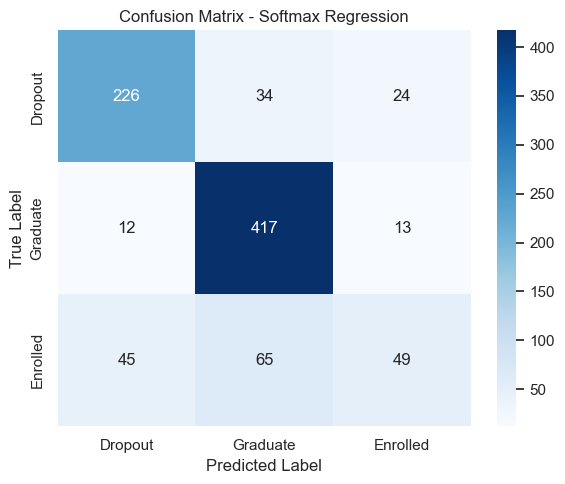

📋 Evaluasi Metrik:
F1 Macro Average     : 0.6892
F1 Micro Average     : 0.7819
Precision Macro Avg  : 0.7255
Precision Micro Avg  : 0.7819
Recall Macro Average : 0.6825
Recall Micro Average : 0.7819


In [139]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Graduate', 'Enrolled'],
            yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Softmax Regression')
plt.tight_layout()
plt.show()

# Evaluasi metrik
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')

recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

print("📋 Evaluasi Metrik:")
print(f"F1 Macro Average     : {f1_macro:.4f}")
print(f"F1 Micro Average     : {f1_micro:.4f}")
print(f"Precision Macro Avg  : {precision_macro:.4f}")
print(f"Precision Micro Avg  : {precision_micro:.4f}")
print(f"Recall Macro Average : {recall_macro:.4f}")
print(f"Recall Micro Average : {recall_micro:.4f}")

d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

`JAWABAN`

Regresi logistik biasa digunakan untuk klasifikasi biner, yaitu ketika target hanya memiliki dua kelas, misalnya 0 atau 1. Model ini menghitung probabilitas suatu data masuk ke kelas tertentu dengan menggunakan fungsi sigmoid, yang menghasilkan nilai antara 0 hingga 1. Prediksi akhir biasanya ditentukan dengan ambang batas (threshold), seperti 0.5.

Sementara itu, regresi softmax adalah perluasan dari regresi logistik untuk masalah klasifikasi multikelas. Model ini digunakan saat target memiliki lebih dari dua kelas, seperti dalam kasus prediksi status mahasiswa: Dropout, Graduate, dan Enrolled. Softmax menghitung probabilitas untuk setiap kelas dan memastikan totalnya menjadi 1. Prediksi akhir adalah kelas dengan probabilitas tertinggi. Dengan kata lain, softmax regression memungkinkan pemodelan klasifikasi yang lebih kompleks dan seimbang untuk banyak kategori.

e) Berdasarkan pemahaman Anda mengenai faktor-faktor yang mempengaruhi keberhasilan mahasiswa, fitur-fitur apa saja yang menurut Anda memiliki pengaruh signifikan dalam memprediksi status mahasiswa (Dropout, Graduate, Enrolled)? Sebutkan minimal lima fitur dan jelaskan alasan pemilihannya!

`JAWABAN`

Berdasarkan konteks pendidikan tinggi dan pemahaman umum saya terhadap faktor akademik dan sosial mahasiswa. Berikut adalah lima fitur yang kemungkinan besar memiliki pengaruh signifikan menurut saya:

- Curricular units 1st sem (approved)
Jumlah mata kuliah yang berhasil diselesaikan di semester pertama mencerminkan kemampuan akademik awal mahasiswa. Mahasiswa yang gagal banyak di awal cenderung berisiko drop out.

- Tuition fees up to date
Status pembayaran menunjukkan kondisi finansial atau komitmen mahasiswa terhadap studinya. Mahasiswa yang menunggak biaya kuliah berpotensi mengalami hambatan akademik atau administratif.

- Debtor
Fitur ini terkait dengan kewajiban akademik atau finansial yang tertunda. Mahasiswa dengan status debtor mungkin mengalami tekanan atau kesulitan untuk melanjutkan studi.

- Scholarship holder
Penerima beasiswa seringkali memiliki prestasi atau kebutuhan ekonomi tertentu. Hal ini bisa menjadi indikator positif untuk keberhasilan akademik, atau justru sebaliknya jika beasiswa dicabut.

- Age at enrollment
Usia saat mendaftar dapat menggambarkan apakah mahasiswa masuk tepat waktu atau termasuk mahasiswa non-tradisional. Mahasiswa dengan usia jauh di atas rata-rata mungkin memiliki tantangan yang berbeda dalam studi.

f) Buatlah masing-masing 1 model regresi softmax menggunakan fitur-fitur yang telah Anda pilih sebelumnya (min. 5 model). Hitung log-odds dan probabilitas prediksi untuk setiap fitur tersebut dan berikan interpretasi mengenai bagaimana masing-masing fitur memengaruhi probabilitas mahasiswa berada di setiap status (Dropout, Graduate, Enrolled)! Hint: https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [140]:
# Ambil 5 fitur terpilih
selected_features = [
    'Curricular units 1st sem (approved)',
    'Tuition fees up to date',
    'Debtor',
    'Scholarship holder',
    'Age at enrollment'
]

# Pastikan target dalam bentuk numerik dan input tidak bernilai NaN
X_softmax = df_students[selected_features]
y_softmax = df_students['Target']

# Tambahkan intercept (konstanta)
X_softmax = sm.add_constant(X_softmax)

softmax_model = sm.MNLogit(y_softmax, X_softmax)

# Fit model
softmax_result = softmax_model.fit(maxiter=200, disp=False)

# Tampilkan ringkasan hasil regresi
print(softmax_result.summary())


                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 4424
Model:                        MNLogit   Df Residuals:                     4412
Method:                           MLE   Df Model:                           10
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.2756
Time:                        22:48:23   Log-Likelihood:                -3268.4
converged:                       True   LL-Null:                       -4511.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           Target=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.6973      0.303    -12.185      0.000      -4.292      -3.103
Curricular units 1st sem (approved)     0.5765      0.02

In [148]:
# Prediksi log-odds untuk seluruh data
log_odds = softmax_result.predict(X_softmax, linear=True)

# Prediksi probabilitas
probabilities = softmax_result.predict(X_softmax)

# Tampilkan contoh hasil prediksi pertama
print("Log-odds (baris pertama):")
print(log_odds.iloc[0])

print("\nProbabilitas prediksi (baris pertama):")
print(probabilities.iloc[0])


Log-odds (baris pertama):
0    0.000000
1   -1.810488
2   -0.984296
Name: 0, dtype: float64

Probabilitas prediksi (baris pertama):
0    0.650501
1    0.106405
2    0.243094
Name: 0, dtype: float64


/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:779: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)


In [142]:
# Prediksi log-odds untuk seluruh data
log_odds = softmax_result.predict(X_softmax, linear=True)

# Prediksi probabilitas
probabilities = softmax_result.predict(X_softmax)

# Tampilkan contoh hasil prediksi pertama
print("Log-odds (baris pertama):")
print(log_odds.iloc[0])

print("\nProbabilitas prediksi (baris pertama):")
print(probabilities.iloc[0])


Log-odds (baris pertama):
0    0.000000
1   -1.810488
2   -0.984296
Name: 0, dtype: float64

Probabilitas prediksi (baris pertama):
0    0.650501
1    0.106405
2    0.243094
Name: 0, dtype: float64


In [143]:
softmax_result.params


,0,1
const,-3.697322,-1.925744
Curricular units 1st sem (approved),0.576540,0.253116
Tuition fees up to date,3.152986,1.928642
Debtor,-0.995804,-0.084653
Scholarship holder,1.298517,0.267793
Age at enrollment,-0.063308,-0.049360


Berikut interpretasi masing-masing fitur dari hasil regresi softmax
- Mahasiswa yang menyelesaikan lebih banyak mata kuliah di semester pertama memiliki peluang lebih tinggi untuk lulus atau tetap terdaftar, dibanding dropout
- Mahasiswa yang membayar biaya kuliah tepat waktu jauh lebih mungkin untuk lulus atau tetap melanjutkan studi, dibandingkan mereka yang menunggak. Efek paling kuat terhadap probabilitas kelulusan
- Mahasiswa yang memiliki utang akademik cenderung lebih besar kemungkinannya untuk dropout, terutama jika dibandingkan dengan lulusan
- Mahasiswa penerima beasiswa memiliki peluang lebih besar untuk menyelesaikan studi dibanding dropout. Efek terhadap enrolled kecil dan hampir tidak signifikan
- Mahasiswa yang masuk pada usia lebih tua sedikit lebih berisiko untuk dropout, dibandingkan mahasiswa yang lebih muda

Fitur yang paling kuat mendorong kelulusan:
- Pembayaran biaya kuliah tepat waktu 
- Jumlah mata kuliah yang disetujui (approved)
- Penerima beasiswa

Sementara itu, faktor yang meningkatkan risiko dropout:
- Adanya utang akademik (debtor)
- Usia masuk yang lebih tua

g) Bangunlah dua model regresi softmax untuk memprediksi status mahasiswa ('Target').
- Model 1: Gunakan semua fitur yang tersedia dalam dataset.
- Model 2: Gunakan fitur-fitur yang paling berpengaruh berdasarkan analisis sebelumnya

In [144]:
import statsmodels.api as sm

# -------- Model 1: Semua Fitur --------
X_model1 = df_students.drop(columns=['Target'])
X_model1 = sm.add_constant(X_model1)
y = df_students['Target']

model1 = sm.MNLogit(y, X_model1)
result1 = model1.fit(maxiter=200, disp=False)

print("Ringkasan Model 1 (Semua Fitur):")
print(result1.summary())

# -------- Model 2: Fitur Terpilih --------
selected_features = [
    'Curricular units 1st sem (approved)',
    'Tuition fees up to date',
    'Debtor',
    'Scholarship holder',
    'Age at enrollment'
]

X_model2 = df_students[selected_features]
X_model2 = sm.add_constant(X_model2)

model2 = sm.MNLogit(y, X_model2)
result2 = model2.fit(maxiter=200, disp=False)

print("\nRingkasan Model 2 (Fitur Terbaik):")
print(result2.summary())

Ringkasan Model 1 (Semua Fitur):
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 4424
Model:                        MNLogit   Df Residuals:                     4354
Method:                           MLE   Df Model:                           68
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.4568
Time:                        22:55:43   Log-Likelihood:                -2450.6
converged:                       True   LL-Null:                       -4511.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      Target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1599      0.594     -0.269      0.788      -1.324   


 Evaluasi Model 1 (Semua Fitur):
Akurasi               : 0.7774
F1 Macro Average      : 0.6934
F1 Micro Average      : 0.7774
Precision Macro Avg   : 0.7262
Precision Micro Avg   : 0.7774
Recall Macro Average  : 0.6842
Recall Micro Average  : 0.7774


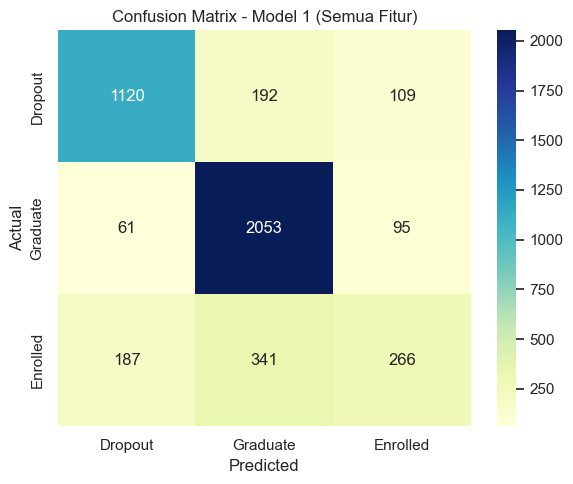


 Evaluasi Model 2 (Fitur Terbaik):
Akurasi               : 0.7030
F1 Macro Average      : 0.5164
F1 Micro Average      : 0.7030
Precision Macro Avg   : 0.5767
Precision Micro Avg   : 0.7030
Recall Macro Average  : 0.5620
Recall Micro Average  : 0.7030


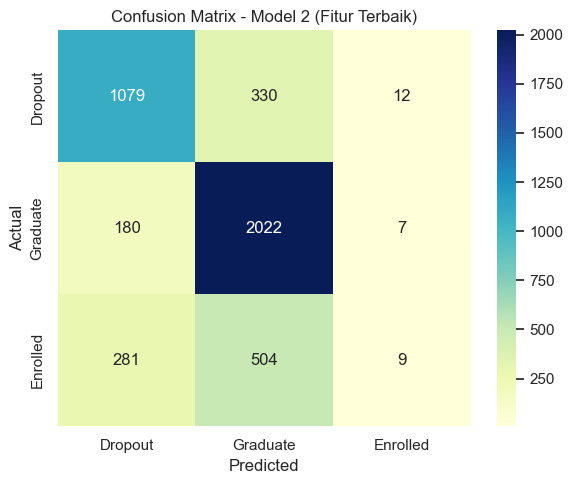

In [149]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    precision_score,
    recall_score
)
def evaluate_softmax_model(result, X, y_true, model_name):
    # Hitung probabilitas prediksi
    probs = result.predict(X)
    
    # Ambil kelas prediksi tertinggi
    y_pred = np.argmax(probs.values, axis=1)

    # Evaluasi
    acc = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    precision_macro = precision_score(y_true, y_pred, average='macro')
    precision_micro = precision_score(y_true, y_pred, average='micro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    recall_micro = recall_score(y_true, y_pred, average='micro')

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n Evaluasi {model_name}:")
    print(f"Akurasi               : {acc:.4f}")
    print(f"F1 Macro Average      : {f1_macro:.4f}")
    print(f"F1 Micro Average      : {f1_micro:.4f}")
    print(f"Precision Macro Avg   : {precision_macro:.4f}")
    print(f"Precision Micro Avg   : {precision_micro:.4f}")
    print(f"Recall Macro Average  : {recall_macro:.4f}")
    print(f"Recall Micro Average  : {recall_micro:.4f}")

    # Tampilkan confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Dropout', 'Graduate', 'Enrolled'],
                yticklabels=['Dropout', 'Graduate', 'Enrolled'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluasi kedua model
evaluate_softmax_model(result1, X_model1, y, "Model 1 (Semua Fitur)")
evaluate_softmax_model(result2, X_model2, y, "Model 2 (Fitur Terbaik)")


h) Jelaskan interpretasi Anda terhadap 2 model pada soal sebelumnya, bandingkan hasil dari kedua model tersebut!

Model 1, yang menggunakan seluruh fitur dalam dataset, menunjukkan performa paling optimal dengan Pseudo R-squared sebesar 0.4568, jauh lebih tinggi dibanding Model 2 yang hanya mencapai 0.2756. Hal ini menunjukkan bahwa informasi yang dikandung oleh fitur-fitur lain di luar lima fitur utama juga memberikan kontribusi besar dalam membedakan status mahasiswa. Selain itu, banyak fitur dalam Model 1 yang signifikan secara statistik (P < 0.05), seperti Course, International, Curricular units 2nd sem (approved), dan Tuition fees up to date, yang memperkuat akurasi model.

Sementara itu, Model 2 hanya mengandalkan lima fitur paling berpengaruh dan menghasilkan performa yang relatif baik, meskipun lebih rendah dari Model 1. Akurasi model ini sebesar 70.3%, dan F1 Macro-nya berada di angka 0.5164, yang cukup layak mengingat modelnya lebih sederhana. Hal ini menunjukkan bahwa lima fitur tersebut memang memegang peran penting dalam memprediksi status mahasiswa, terutama Curricular units 1st sem (approved) dan Tuition fees up to date, yang konsisten signifikan dan berdampak positif terhadap probabilitas lulus atau tetap terdaftar.



## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**
- [Kaggle Competition - LAB 6 Regression](https://www.kaggle.com/t/96a47d635616ec19ada1bc969f256957)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 6 ini, kalian **wajib** mengikuti kompetisi Kaggle di atas.

In [150]:
# Write code here
train = pd.read_csv('efficiency_train.csv')
test = pd.read_csv('efficiency_test.csv')

train.head()

,id,timestamp,qtr,dept,weekday,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers,real_efficiency
0,520,1/31/2015,Q5,B,Saturday,2,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.971867
1,893,2/23/2015,Q4,A,Monday,11,0.75,11.41,826.0,2820,0,0.0,0,2,58.0,0.750294
2,650,2/7/2015,Q1,A,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
3,1175,3/11/2015,Q2,B,Wednesday,2,0.75,3.90,NaN,1920,0,0.0,0,0,8.0,0.819271
4,403,1/24/2015,Q4,A,Saturday,10,0.75,22.52,1332.0,10080,69,0.0,0,0,56.0,0.800630


In [152]:
# Buat ringkasan untuk setiap kolom
summary = []

for col in train.columns:
    summary.append({
        'Column': col,
        'Data Type': train[col].dtype,
        'Non-Null Count': train[col].notna().sum(),
        'Null Count': train[col].isna().sum(),
        'Unique Count': train[col].nunique(),
        'Example Unique Values': train[col].unique()[:5]  # hanya tampilkan max 5 contoh
    })

# Ubah ke DataFrame
summary_df = pd.DataFrame(summary)

# Set kolom 'Column' sebagai index untuk tampilan lebih rapi
summary_df.set_index('Column', inplace=True)

# Tampilkan ringkasan
summary_df


,Data Type,Non-Null Count,Null Count,Unique Count,Example Unique Values
Column,,,,,
id,int64,838,0,838,"[520, 893, 650, 1175, 403]"
timestamp,object,838,0,59,"[1/31/2015, 2/23/2015, 2/7/2015, 3/11/2015, 1/..."
qtr,object,838,0,5,"[Q5, Q4, Q1, Q2, Q3]"
dept,object,838,0,2,"[B, A]"
weekday,object,838,0,6,"[Saturday, Monday, Wednesday, Sunday, Tuesday]"
group,int64,838,0,12,"[2, 11, 7, 10, 3]"
planned_efficiency,float64,838,0,8,"[0.8, 0.75, 0.7, 0.65, 0.6]"
std_min_value,float64,838,0,63,"[3.94, 11.41, 24.26, 3.9, 22.52]"
work_in_progress,float64,485,353,407,"[nan, 826.0, 658.0, 1332.0, 1136.0]"


## Preprocessing

referensi : claude


----- Training Dataset -----
Shape: (838, 16)

Sample data:
     id  timestamp qtr dept    weekday  group  planned_efficiency  \
0   520  1/31/2015  Q5    B   Saturday      2                0.80   
1   893  2/23/2015  Q4    A     Monday     11                0.75   
2   650   2/7/2015  Q1    A   Saturday      7                0.70   
3  1175  3/11/2015  Q2    B  Wednesday      2                0.75   
4   403  1/24/2015  Q4    A   Saturday     10                0.75   

   std_min_value  work_in_progress  extra_hours  bonus  downtime  \
0           3.94               NaN         1200      0       0.0   
1          11.41             826.0         2820      0       0.0   
2          24.26             658.0         6960      0     270.0   
3           3.90               NaN         1920      0       0.0   
4          22.52            1332.0        10080     69       0.0   

   inactive_workers  style_changes  num_workers  real_efficiency  
0                 0              0         10.0 

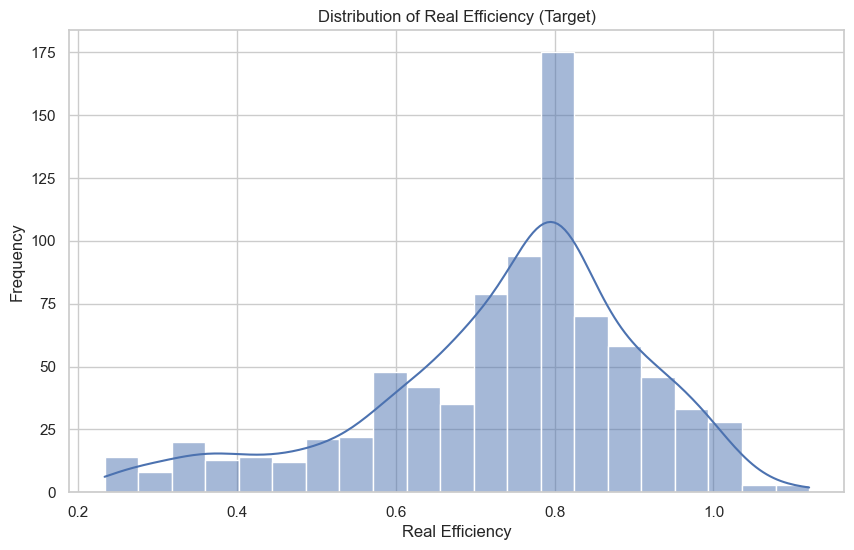


Preprocessing completed successfully!


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load data
train = pd.read_csv('efficiency_train.csv')
test = pd.read_csv('efficiency_test.csv')

# Function to analyze and display basic dataset information
def analyze_data(df, title):
    print(f"\n----- {title} -----")
    print(f"Shape: {df.shape}")
    print("\nSample data:")
    print(df.head())
    print("\nData info:")
    print(df.info())
    print("\nNumerical features statistics:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())

# Analyze datasets
analyze_data(train, "Training Dataset")
analyze_data(test, "Testing Dataset")

# PENTING: Pastikan semua feature engineering dilakukan SEBELUM menentukan kolom untuk preprocessing

# Feature engineering on timestamp column
# Convert timestamp to datetime
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])

# Extract features from timestamp
train['month'] = train['timestamp'].dt.month
train['year'] = train['timestamp'].dt.year
train['day'] = train['timestamp'].dt.day

test['month'] = test['timestamp'].dt.month
test['year'] = test['timestamp'].dt.year
test['day'] = test['timestamp'].dt.day

# Create efficiency gap feature if applicable
if 'real_efficiency' in train.columns and 'planned_efficiency' in train.columns:
    train['efficiency_gap'] = train['real_efficiency'] - train['planned_efficiency']
    
if 'real_efficiency' in test.columns and 'planned_efficiency' in test.columns:
    test['efficiency_gap'] = test['real_efficiency'] - test['planned_efficiency']

# Create worker utilization feature
if 'num_workers' in train.columns and 'inactive_workers' in train.columns:
    train['worker_utilization'] = (train['num_workers'] - train['inactive_workers']) / train['num_workers']
    train['worker_utilization'] = train['worker_utilization'].fillna(0)  # In case all workers are inactive

if 'num_workers' in test.columns and 'inactive_workers' in test.columns:
    test['worker_utilization'] = (test['num_workers'] - test['inactive_workers']) / test['num_workers']
    test['worker_utilization'] = test['worker_utilization'].fillna(0)  # In case all workers are inactive

# Display the columns after feature engineering
print("\nColumns in training data after feature engineering:")
print(train.columns.tolist())

# Check correlations
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')  # Remove ID from correlation analysis

# Correlation heatmap (optional - uncomment if you want to see it)
# plt.figure(figsize=(12, 10))
# correlation_matrix = train[numeric_cols].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix of Numerical Features')
# plt.tight_layout()
# plt.show()

# Print high correlations with target variable if available
if 'real_efficiency' in numeric_cols:
    correlation_matrix = train[numeric_cols].corr()
    target_corr = correlation_matrix['real_efficiency'].sort_values(ascending=False)
    print("\nFeatures correlation with target (real_efficiency):")
    print(target_corr)

# 5. Identify categorical and numerical columns for preprocessing
# IMPORTANT: Make sure to include the newly created columns!
categorical_cols = ['qtr', 'dept', 'weekday', 'group']
numerical_cols = [col for col in train.columns if col not in categorical_cols + ['id', 'timestamp', 'real_efficiency'] 
                  and col in test.columns]  # Ensure column exists in both train and test

print("\nNumerical columns for preprocessing:")
print(numerical_cols)
print("\nCategorical columns for preprocessing:")
print(categorical_cols)

# 6. Define preprocessing pipeline
# For numerical features: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical features: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 7. Prepare data for modeling
test_has_target = 'real_efficiency' in test.columns

# Using only training data and creating a validation split
X_train = train.drop(['id', 'timestamp', 'real_efficiency'], axis=1)
y_train = train['real_efficiency']

# Split data into train and validation
X_train_model, X_test, y_train_model, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Prepare test data
if test_has_target:
    X_test_submission = test.drop(['id', 'timestamp', 'real_efficiency'], axis=1)
else:
    X_test_submission = test.drop(['id', 'timestamp'], axis=1)

# 8. Fit the preprocessor on training data
print("\nApplying preprocessing transforms...")
X_train_processed = preprocessor.fit_transform(X_train_model)
X_test_processed = preprocessor.transform(X_test)

# 9. Get feature names after preprocessing for better interpretability
numerical_features = numerical_cols
categorical_features = []
for cat_col in categorical_cols:
    unique_values = train[cat_col].unique()
    # Skip the first value due to drop='first' in OneHotEncoder
    for i, value in enumerate(unique_values):
        if i > 0:  # Skip the first category as it's dropped
            categorical_features.append(f"{cat_col}_{value}")

processed_feature_names = numerical_features + categorical_features

# Display preprocessed data dimensions
print(f"\nPreprocessed training data shape: {X_train_processed.shape}")
print(f"Preprocessed testing data shape: {X_test_processed.shape}")

# 10. Check for extreme values in the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Real Efficiency (Target)')
plt.xlabel('Real Efficiency')
plt.ylabel('Frequency')
plt.show()

print("\nPreprocessing completed successfully!")

## Modelling

referensi : claude

In [167]:
# Hyperparameter Tuning untuk Model Linear, Lasso, dan Ridge Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np
import pandas as pd
import time

# Function untuk evaluasi hasil hyperparameter tuning
def evaluate_tuning_results(grid_result, param_name, model_name):
    # Mengambil hasil dan parameter
    results = grid_result.cv_results_
    params = results['params']
    mean_test_scores = results['mean_test_score']
    std_test_scores = results['std_test_score']
    
    # Convert negative MSE to RMSE
    if grid_result.scoring == 'neg_mean_squared_error':
        mean_test_scores = np.sqrt(-mean_test_scores)
        std_test_scores = std_test_scores / 2  # approximation for variance conversion
    
    # Membuat DataFrame untuk visualisasi
    param_values = [p[param_name] for p in params]
    
    # Menampilkan nilai optimal
    best_idx = np.argmin(mean_test_scores)
    print(f"\nBest {param_name} value: {param_values[best_idx]}")
    print(f"Best RMSE: {mean_test_scores[best_idx]:.4f} ± {std_test_scores[best_idx]:.4f}")
    
    return param_values[best_idx]

# 1. LINEAR REGRESSION (tidak banyak hyperparameter untuk tuning)
print("\n===== LINEAR REGRESSION TUNING =====")
# Parameter yang valid untuk LinearRegression di sklearn terbaru
lr_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Mengganti 'normalize' yang deprecated dengan 'positive'
}

lr_scorer = make_scorer(mean_squared_error, greater_is_better=False)

lr_grid = GridSearchCV(
    LinearRegression(),
    lr_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
lr_grid.fit(X_train_processed, y_train_model)
lr_tuning_time = time.time() - start_time

print(f"Linear Regression tuning completed in {lr_tuning_time:.2f} seconds")
print("Best parameters:", lr_grid.best_params_)
print("Best RMSE:", np.sqrt(-lr_grid.best_score_))

# Mendapatkan model terbaik
best_lr = lr_grid.best_estimator_

# 2. LASSO REGRESSION
print("\n===== LASSO REGRESSION TUNING =====")
# Tuning untuk alpha dan max_iter
lasso_param_grid = {
    'alpha': np.logspace(-4, 2, 20),  # Lebih banyak nilai alpha
    'max_iter': [1000, 3000, 5000, 10000],
    'selection': ['cyclic', 'random'],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Untuk dataset besar, RandomizedSearchCV lebih efisien
lasso_random_search = RandomizedSearchCV(
    Lasso(random_state=42),
    lasso_param_grid,
    n_iter=30,  # Jumlah kombinasi parameter yang diuji
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
lasso_random_search.fit(X_train_processed, y_train_model)
lasso_tuning_time = time.time() - start_time

print(f"Lasso Regression tuning completed in {lasso_tuning_time:.2f} seconds")
print("Best parameters:", lasso_random_search.best_params_)
print("Best RMSE:", np.sqrt(-lasso_random_search.best_score_))

# Evaluasi hasil tuning parameter alpha tanpa visualisasi
best_lasso_alpha = evaluate_tuning_results(lasso_random_search, 'alpha', 'Lasso Regression')

# Mendapatkan model terbaik
best_lasso = lasso_random_search.best_estimator_

# 3. RIDGE REGRESSION
print("\n===== RIDGE REGRESSION TUNING =====")
# Tuning untuk alpha dan solver
ridge_param_grid = {
    'alpha': np.logspace(-4, 4, 20),  # Lebih banyak nilai alpha
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [1000, 5000, 10000]
}

# Menggunakan RandomizedSearchCV untuk efisiensi
ridge_random_search = RandomizedSearchCV(
    Ridge(random_state=42),
    ridge_param_grid,
    n_iter=30,  # Jumlah kombinasi parameter yang diuji
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
ridge_random_search.fit(X_train_processed, y_train_model)
ridge_tuning_time = time.time() - start_time

print(f"Ridge Regression tuning completed in {ridge_tuning_time:.2f} seconds")
print("Best parameters:", ridge_random_search.best_params_)
print("Best RMSE:", np.sqrt(-ridge_random_search.best_score_))

# Evaluasi hasil tuning parameter alpha tanpa visualisasi
best_ridge_alpha = evaluate_tuning_results(ridge_random_search, 'alpha', 'Ridge Regression')

# Mendapatkan model terbaik
best_ridge = ridge_random_search.best_estimator_

# 4. ELASTIC NET (Gabungan Lasso dan Ridge)
print("\n===== ELASTIC NET TUNING =====")
# Tuning untuk alpha, l1_ratio, dan max_iter
elasticnet_param_grid = {
    'alpha': np.logspace(-4, 2, 15),
    'l1_ratio': np.linspace(0.1, 0.9, 9),  # 0 = Ridge, 1 = Lasso
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3]
}

# Menggunakan RandomizedSearchCV untuk efisiensi
elasticnet_random_search = RandomizedSearchCV(
    ElasticNet(random_state=42),
    elasticnet_param_grid,
    n_iter=30,  # Jumlah kombinasi parameter yang diuji
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
elasticnet_random_search.fit(X_train_processed, y_train_model)
elasticnet_tuning_time = time.time() - start_time

print(f"ElasticNet tuning completed in {elasticnet_tuning_time:.2f} seconds")
print("Best parameters:", elasticnet_random_search.best_params_)
print("Best RMSE:", np.sqrt(-elasticnet_random_search.best_score_))

# Mendapatkan model terbaik
best_elasticnet = elasticnet_random_search.best_estimator_

# Ringkasan tuning time
tuning_times = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet'],
    'Tuning Time (s)': [lr_tuning_time, lasso_tuning_time, ridge_tuning_time, elasticnet_tuning_time]
})
print("\nTuning Times:")
print(tuning_times)

# 5. Evaluasi dan Perbandingan Model yang Telah Di-tuning
def evaluate_tuned_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fitting model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Performance metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    
    return {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }

# Evaluate all tuned models
print("\n===== EVALUATING TUNED MODELS =====")
lr_results = evaluate_tuned_model(best_lr, X_train_processed, X_test_processed, 
                                  y_train_model, y_test, "Linear Regression (Tuned)")
lasso_results = evaluate_tuned_model(best_lasso, X_train_processed, X_test_processed, 
                                    y_train_model, y_test, "Lasso Regression (Tuned)")
ridge_results = evaluate_tuned_model(best_ridge, X_train_processed, X_test_processed, 
                                    y_train_model, y_test, "Ridge Regression (Tuned)")
elasticnet_results = evaluate_tuned_model(best_elasticnet, X_train_processed, X_test_processed, 
                                        y_train_model, y_test, "ElasticNet (Tuned)")

# Compare all models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet'],
    'Training RMSE': [lr_results['train_rmse'], lasso_results['train_rmse'], 
                      ridge_results['train_rmse'], elasticnet_results['train_rmse']],
    'Testing RMSE': [lr_results['test_rmse'], lasso_results['test_rmse'], 
                     ridge_results['test_rmse'], elasticnet_results['test_rmse']],
    'Training R²': [lr_results['train_r2'], lasso_results['train_r2'], 
                    ridge_results['train_r2'], elasticnet_results['train_r2']],
    'Testing R²': [lr_results['test_r2'], lasso_results['test_r2'], 
                   ridge_results['test_r2'], elasticnet_results['test_r2']]
})

print("\n===== MODEL COMPARISON =====")
model_comparison_sorted = model_comparison.sort_values('Testing RMSE')
print(model_comparison_sorted)

# 1. Identifikasi model terbaik (RMSE terendah)
best_model_name = model_comparison_sorted.iloc[0]['Model']
print(f"\nModel terbaik berdasarkan Testing RMSE: {best_model_name}")

# 2. Dapatkan model terbaik dan prediksinya
if best_model_name == 'Linear Regression':
    best_model = best_lr
    best_preds = lr_results['y_test_pred']
elif best_model_name == 'Lasso Regression':
    best_model = best_lasso
    best_preds = lasso_results['y_test_pred']
elif best_model_name == 'Ridge Regression':
    best_model = best_ridge
    best_preds = ridge_results['y_test_pred']
else:
    best_model = best_elasticnet
    best_preds = elasticnet_results['y_test_pred']

# 3. Buat prediksi untuk data test
X_test_submission_processed = preprocessor.transform(X_test_submission)
final_predictions = best_model.predict(X_test_submission_processed)

# 4. Simpan semua prediksi dalam CSV
# Format DataFrame untuk prediksi
# Create the pandas DataFrames for submissions

# For best model predictions
submission_best = pd.DataFrame({
    'id': test['id'],  # Use actual ID values from test dataset
    'real_efficiency': final_predictions
})

# Simpan prediksi dari model terbaik
submission_best.to_csv('best_model_predictions.csv', index=False)
print(f"Prediksi dari model terbaik ({best_model_name}) disimpan ke 'best_model_predictions.csv'")

# Simpan model comparison ke CSV
model_comparison_sorted.to_csv('model_comparison_results.csv', index=False)
print("Perbandingan model disimpan ke 'model_comparison_results.csv'")

# Simpan prediksi untuk setiap model (opsional)
# Linear Regression
lr_preds = best_lr.predict(X_test_submission_processed)
pd.DataFrame({
    'id': test['id'],  # Use actual ID values
    'real_efficiency': lr_preds
}).to_csv('linear_regression_predictions.csv', index=False)

# Lasso
lasso_preds = best_lasso.predict(X_test_submission_processed)
pd.DataFrame({
    'id': test['id'],  # Use actual ID values
    'real_efficiency': lasso_preds
}).to_csv('lasso_regression_predictions.csv', index=False)

# Ridge
ridge_preds = best_ridge.predict(X_test_submission_processed)
pd.DataFrame({
    'id': test['id'],  # Use actual ID values
    'real_efficiency': ridge_preds
}).to_csv('ridge_regression_predictions.csv', index=False)

# ElasticNet
elasticnet_preds = best_elasticnet.predict(X_test_submission_processed)
pd.DataFrame({
    'id': test['id'],  # Use actual ID values
    'real_efficiency': elasticnet_preds
}).to_csv('elasticnet_predictions.csv', index=False)

print("Semua prediksi model disimpan dalam format CSV!")


===== LINEAR REGRESSION TUNING =====
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Linear Regression tuning completed in 0.14 seconds
Best parameters: {'fit_intercept': True, 'positive': False}
Best RMSE: 0.1515686655211814

===== LASSO REGRESSION TUNING =====
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Lasso Regression tuning completed in 0.21 seconds
Best parameters: {'tol': 0.001, 'selection': 'random', 'max_iter': 10000, 'alpha': np.float64(0.00042813323987193956)}
Best RMSE: 0.14792642777305473

Best alpha value: 0.00042813323987193956
Best RMSE: 0.1479 ± 0.0015

===== RIDGE REGRESSION TUNING =====
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/main-ds/lib/python3

Ridge Regression tuning completed in 0.32 seconds
Best parameters: {'tol': 0.0001, 'solver': 'auto', 'max_iter': 10000, 'alpha': np.float64(1.623776739188721)}
Best RMSE: 0.14780534391299852

Best alpha value: 1.623776739188721
Best RMSE: 0.1478 ± 0.0014

===== ELASTIC NET TUNING =====
Fitting 5 folds for each of 30 candidates, totalling 150 fits
ElasticNet tuning completed in 0.10 seconds
Best parameters: {'tol': 0.001, 'max_iter': 1000, 'l1_ratio': np.float64(0.6), 'alpha': np.float64(0.0007196856730011522)}
Best RMSE: 0.14793001137565964

Tuning Times:
               Model  Tuning Time (s)
0  Linear Regression         0.141889
1              Lasso         0.210071
2              Ridge         0.322585
3         ElasticNet         0.104046

===== EVALUATING TUNED MODELS =====

Linear Regression (Tuned) Results:
Training RMSE: 0.1406
Testing RMSE: 0.1453
Training R²: 0.3307
Testing R²: 0.2609

Lasso Regression (Tuned) Results:
Training RMSE: 0.1413
Testing RMSE: 0.1453
Training R²: 0.